In [9]:
import processing_functions as pf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib
params={
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

# **0.1s**

In [10]:
lc1_01 = '/home/ravioli/astro/ksp/grb/GRB160909A/01s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q0.lc'
lc2_01 = '/home/ravioli/astro/ksp/grb/GRB160909A/01s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q1.lc'
lc3_01 = '/home/ravioli/astro/ksp/grb/GRB160909A/01s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q2.lc'
lc4_01 = '/home/ravioli/astro/ksp/grb/GRB160909A/01s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q3.lc'

lc1_01_data = pf.openlc(lc1_01)
lc2_01_data = pf.openlc(lc2_01)
lc3_01_data = pf.openlc(lc3_01)
lc4_01_data = pf.openlc(lc4_01)

total_counts_01 = lc1_01_data['RATE'] + lc2_01_data['RATE'] + lc3_01_data['RATE'] + lc4_01_data['RATE']
total_lc_01 = '/home/ravioli/astro/ksp/grb/GRB160909A/01s/GRB160909A-total-counts.lc'

total_lc_01_data = pf.openlc(total_lc_01)

In [11]:
# hdu = fits.open(lc1_01)
# hdr = hdu[1].header
# data = hdu[1].data
# data['RATE'] = total_counts_01
# hdu.writeto('/home/ravioli/astro/ksp/grb/GRB160909A/01s/GRB160909A-total-counts.lc', overwrite=True)
# hdu.close()

In [12]:
max_01 = np.where(total_counts_01 == np.max(total_counts_01[7580:8580]))[0][0]
start_01 = max_01-100
end_01 = max_01+100

In [109]:
print(start_01, end_01)

8239 8439


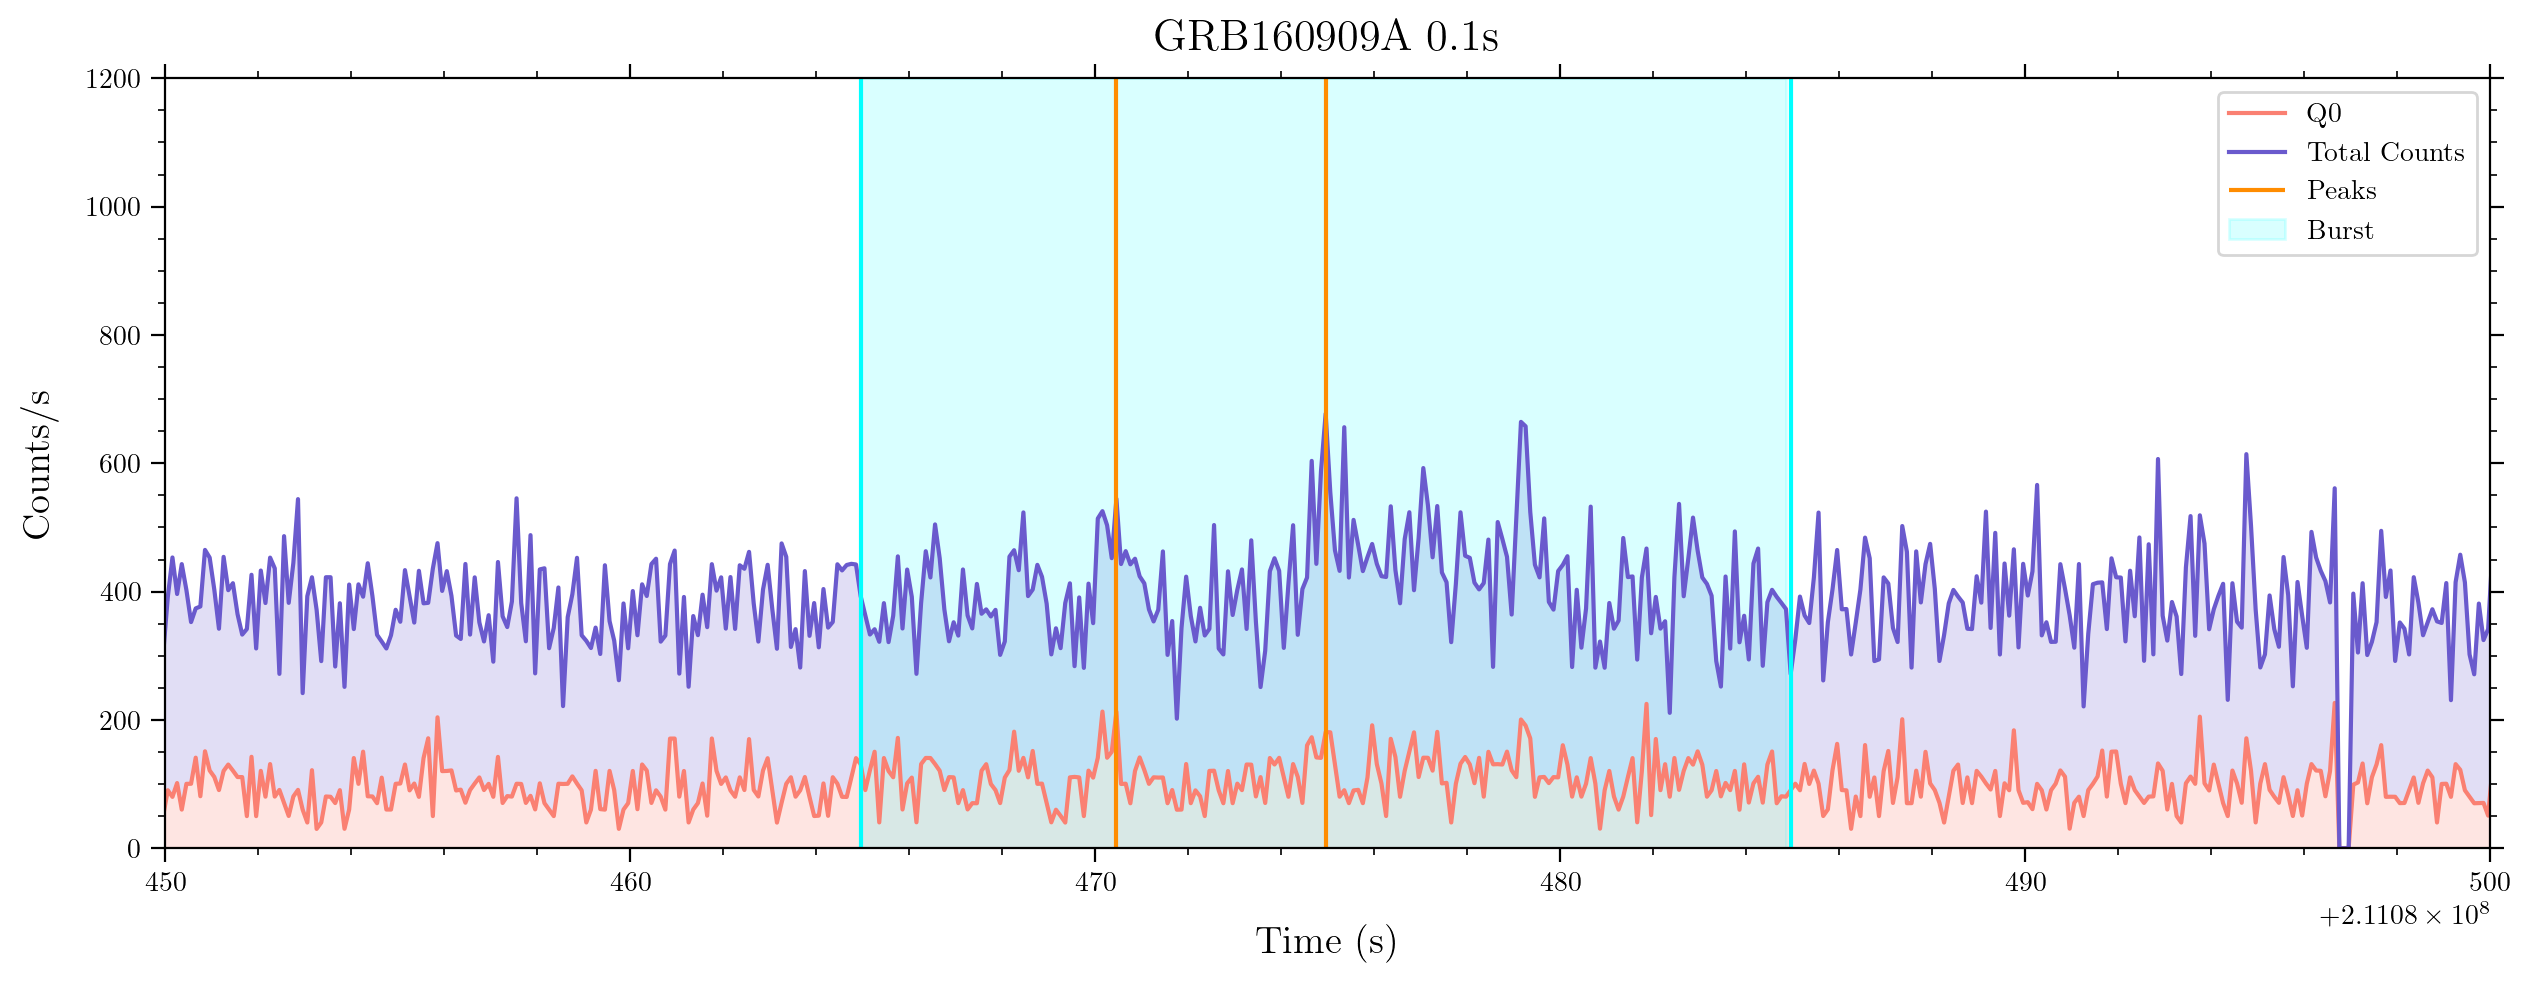

In [13]:
plt.figure(figsize=(15,5), dpi=200)
plt.plot(lc1_01_data['TIME'],lc1_01_data['RATE'], label='Q0', color='salmon')
plt.plot(total_lc_01_data['TIME'],total_counts_01, label='Total Counts', color = 'slateblue')
plt.xlim(211080450, 211080500)
plt.ylim(0, 1200)
plt.vlines(total_lc_01_data['TIME'][start_01], 0, 1200, color='cyan')
plt.vlines(total_lc_01_data['TIME'][end_01], 0, 1200, color='cyan')
plt.vlines(total_lc_01_data['TIME'][max_01], 0, 1200, color='darkorange', label='Peaks')
plt.vlines(total_lc_01_data['TIME'][max_01-45], 0, 1200, color='darkorange')
plt.fill_between(total_lc_01_data['TIME'], lc1_01_data['RATE'], total_counts_01, color='slateblue', alpha=0.2)
plt.fill_between(total_lc_01_data['TIME'], 0, lc1_01_data['RATE'], color='salmon', alpha=0.2)
plt.fill_between(total_lc_01_data['TIME'][start_01:end_01],1200, color='cyan', alpha=0.15, label="Burst")
plt.xlabel('Time (s)', labelpad=10, fontsize=14)
plt.ylabel('Counts/s', labelpad=10, fontsize=14)
plt.title('GRB160909A 0.1s', fontsize=16, pad=10)
plt.legend()
plt.show()

In [14]:
snr_gauss_01, *_, popt_gauss_01  = pf.snr_gauss(total_lc_01, start_01, end_01, in_bins=500, window=1001)
snr_gamma_01, *_, popt_gamma_01 = pf.snr_gamma(total_lc_01, start_01, end_01, in_bins=500, window=1001)
snr_skewnorm_01, *_, popt_skewnorm_01 = pf.snr_skewnorm(total_lc_01, start_01, end_01, in_bins=500, window=1001)
snr_poisson_01, *_, popt_poisson_01 = pf.snr_poisson(total_lc_01, start_01, end_01, in_bins=500, window=1001)
snr_counts_01 = pf.snr_counts(total_lc_01, start_01, end_01, window=1001)

In [15]:
print("SNR for Gaussian Fit: ", snr_gauss_01)
print("SNR for Gamma Fit: ", snr_gamma_01)
print("SNR for Skewnorm Fit: ", snr_skewnorm_01)
print("SNR for Poisson Fit: ", snr_poisson_01)
print("SNR for Counts: ", snr_counts_01)

SNR for Gaussian Fit:  1.2794029854700872
SNR for Gamma Fit:  1.0338481241872852
SNR for Skewnorm Fit:  1.190448785021938
SNR for Poisson Fit:  1.0054890963388259
SNR for Counts:  1.1415912656995242


# **0.2s**

In [16]:
lc1_02 = '/home/ravioli/astro/ksp/grb/GRB160909A/02s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q0.lc'
lc2_02 = '/home/ravioli/astro/ksp/grb/GRB160909A/02s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q1.lc'
lc3_02 = '/home/ravioli/astro/ksp/grb/GRB160909A/02s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q2.lc'
lc4_02 = '/home/ravioli/astro/ksp/grb/GRB160909A/02s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q3.lc'

lc1_02_data = pf.openlc(lc1_02)
lc2_02_data = pf.openlc(lc2_02)
lc3_02_data = pf.openlc(lc3_02)
lc4_02_data = pf.openlc(lc4_02)

total_counts_02 = lc1_02_data['RATE'] + lc2_02_data['RATE'] + lc3_02_data['RATE'] + lc4_02_data['RATE']
total_lc_02 = '/home/ravioli/astro/ksp/grb/GRB160909A/02s/GRB160909A-total-counts.lc'
total_lc_02_data = pf.openlc(total_lc_02)

In [17]:
# hdu = fits.open(lc1_02)
# hdr = hdu[1].header
# data = hdu[1].data
# data['RATE'] = total_counts_02
# hdu.writeto('/home/ravioli/astro/ksp/grb/GRB160909A/02s/GRB160909A-total-counts.lc', overwrite=True)
# hdu.close()

In [18]:
max_02 = np.where(total_counts_02 == np.max(total_counts_02[3790:4290]))[0][0]
start_02 = max_02-50
end_02 = max_02+50

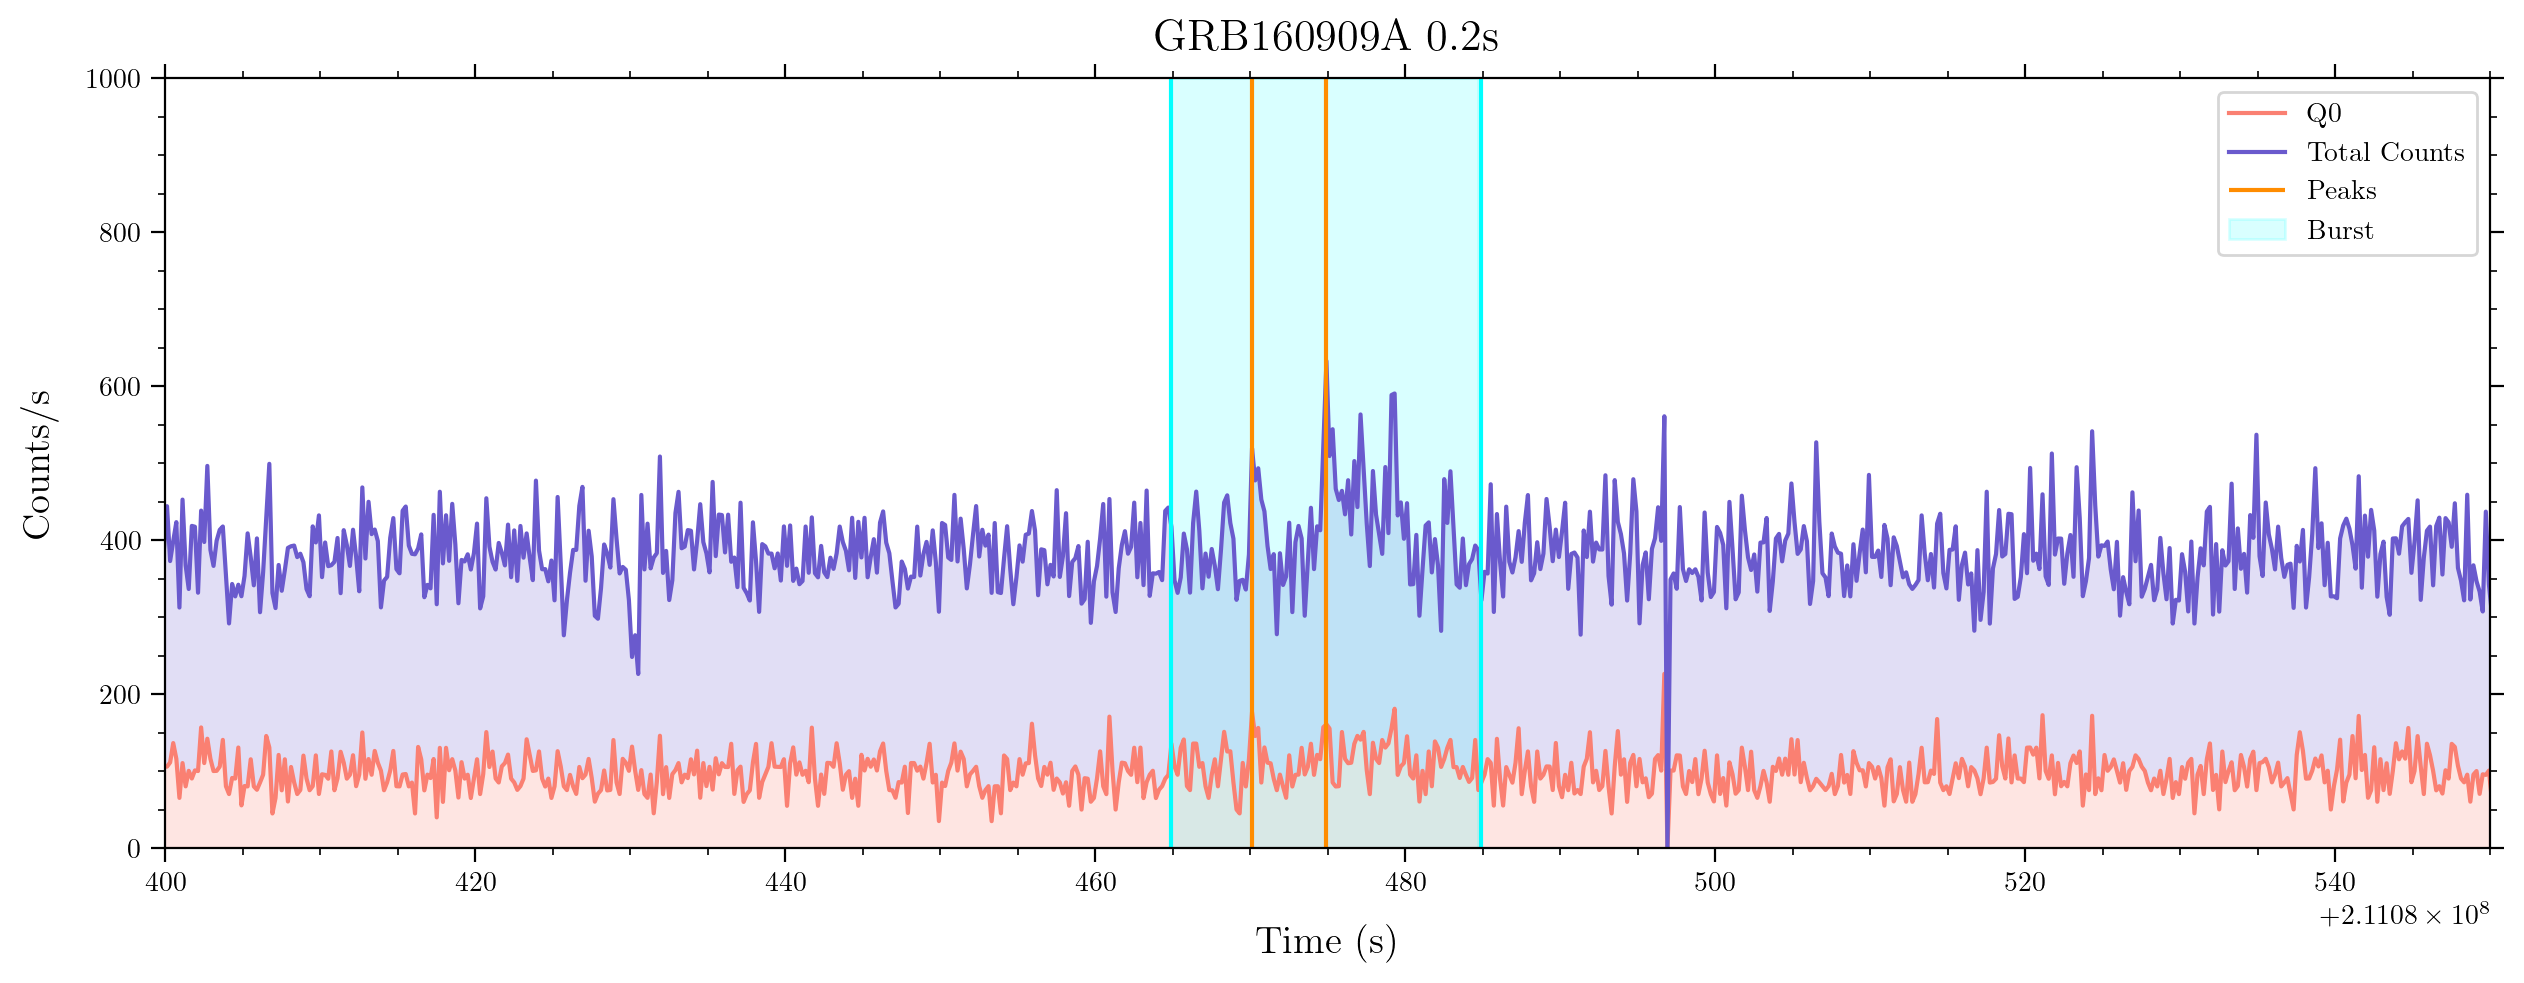

In [19]:
plt.figure(figsize=(15,5), dpi=200)
plt.plot(lc1_02_data['TIME'],lc1_02_data['RATE'], label='Q0', color='salmon')
plt.plot(total_lc_02_data['TIME'],total_counts_02, label='Total Counts', color = 'slateblue')
plt.xlim(211080400, 211080550)
plt.ylim(0, 1000)
plt.vlines(total_lc_02_data['TIME'][start_02], 0, 1000, color='cyan')
plt.vlines(total_lc_02_data['TIME'][end_02], 0, 1000, color='cyan')
plt.vlines(total_lc_02_data['TIME'][max_02], 0, 1000, color='darkorange', label='Peaks')
plt.vlines(total_lc_02_data['TIME'][max_02-24], 0, 1000, color='darkorange')
plt.fill_between(total_lc_02_data['TIME'], lc1_02_data['RATE'], total_counts_02, color='slateblue', alpha=0.2)
plt.fill_between(total_lc_02_data['TIME'], 0, lc1_02_data['RATE'], color='salmon', alpha=0.2)
plt.fill_between(total_lc_02_data['TIME'][start_02:end_02],1000, color='cyan', alpha=0.15, label="Burst")
plt.xlabel('Time (s)', labelpad=10, fontsize=14)
plt.ylabel('Counts/s', labelpad=10, fontsize=14)
plt.title('GRB160909A 0.2s', fontsize=16, pad=10)
plt.legend()
plt.show()

In [20]:
snr_gauss_02, *_, popt_gauss_02 = pf.snr_gauss(total_lc_02, start_02, end_02, in_bins=450, window=901)
snr_gamma_02, *_, popt_gamma_02 = pf.snr_gamma(total_lc_02, start_02, end_02, in_bins=450, window=901)
snr_skewnorm_02, *_, popt_skewnorm_02 = pf.snr_skewnorm(total_lc_02, start_02, end_02, in_bins=450, window=901)
snr_poisson_02, *_, popt_poisson_02 = pf.snr_poisson(total_lc_02, start_02, end_02, in_bins=450, window=901)
snr_counts_02 = pf.snr_counts(total_lc_02, start_02, end_02, window=901)

In [21]:
print("SNR for Gaussian Fit: ", snr_gauss_02)
print("SNR for Gamma Fit: ", snr_gamma_02)
print("SNR for Skewnorm Fit: ", snr_skewnorm_02)
print("SNR for Poisson Fit: ", snr_poisson_02)
print("SNR for Counts: ", snr_counts_02)

SNR for Gaussian Fit:  1.4665350207251688
SNR for Gamma Fit:  2.0906722131339124
SNR for Skewnorm Fit:  1.3926177273615197
SNR for Poisson Fit:  1.014404773814594
SNR for Counts:  1.3164213988009372


# **0.3s**

In [22]:
lc1_03 = '/home/ravioli/astro/ksp/grb/GRB160909A/03s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q0.lc'
lc2_03 = '/home/ravioli/astro/ksp/grb/GRB160909A/03s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q1.lc'
lc3_03 = '/home/ravioli/astro/ksp/grb/GRB160909A/03s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q2.lc'
lc4_03 = '/home/ravioli/astro/ksp/grb/GRB160909A/03s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q3.lc'

lc1_03_data = pf.openlc(lc1_03)
lc2_03_data = pf.openlc(lc2_03)
lc3_03_data = pf.openlc(lc3_03)
lc4_03_data = pf.openlc(lc4_03)

total_counts_03 = lc1_03_data['RATE'] + lc2_03_data['RATE'] + lc3_03_data['RATE'] + lc4_03_data['RATE']
total_lc_03 = '/home/ravioli/astro/ksp/grb/GRB160909A/03s/GRB160909A-total-counts.lc'
total_lc_03_data = pf.openlc(total_lc_03)

In [23]:
# hdu = fits.open(lc1_03)
# hdr = hdu[1].header
# data = hdu[1].data
# data['RATE'] = total_counts_03
# hdu.writeto('/home/ravioli/astro/ksp/grb/GRB160909A/03s/GRB160909A-total-counts.lc', overwrite=True)
# hdu.close()

In [24]:
max_03 = np.where(total_counts_03 == np.max(total_counts_03[2520:3020]))[0][0]
start_03 = max_03-34
end_03 = max_03+34

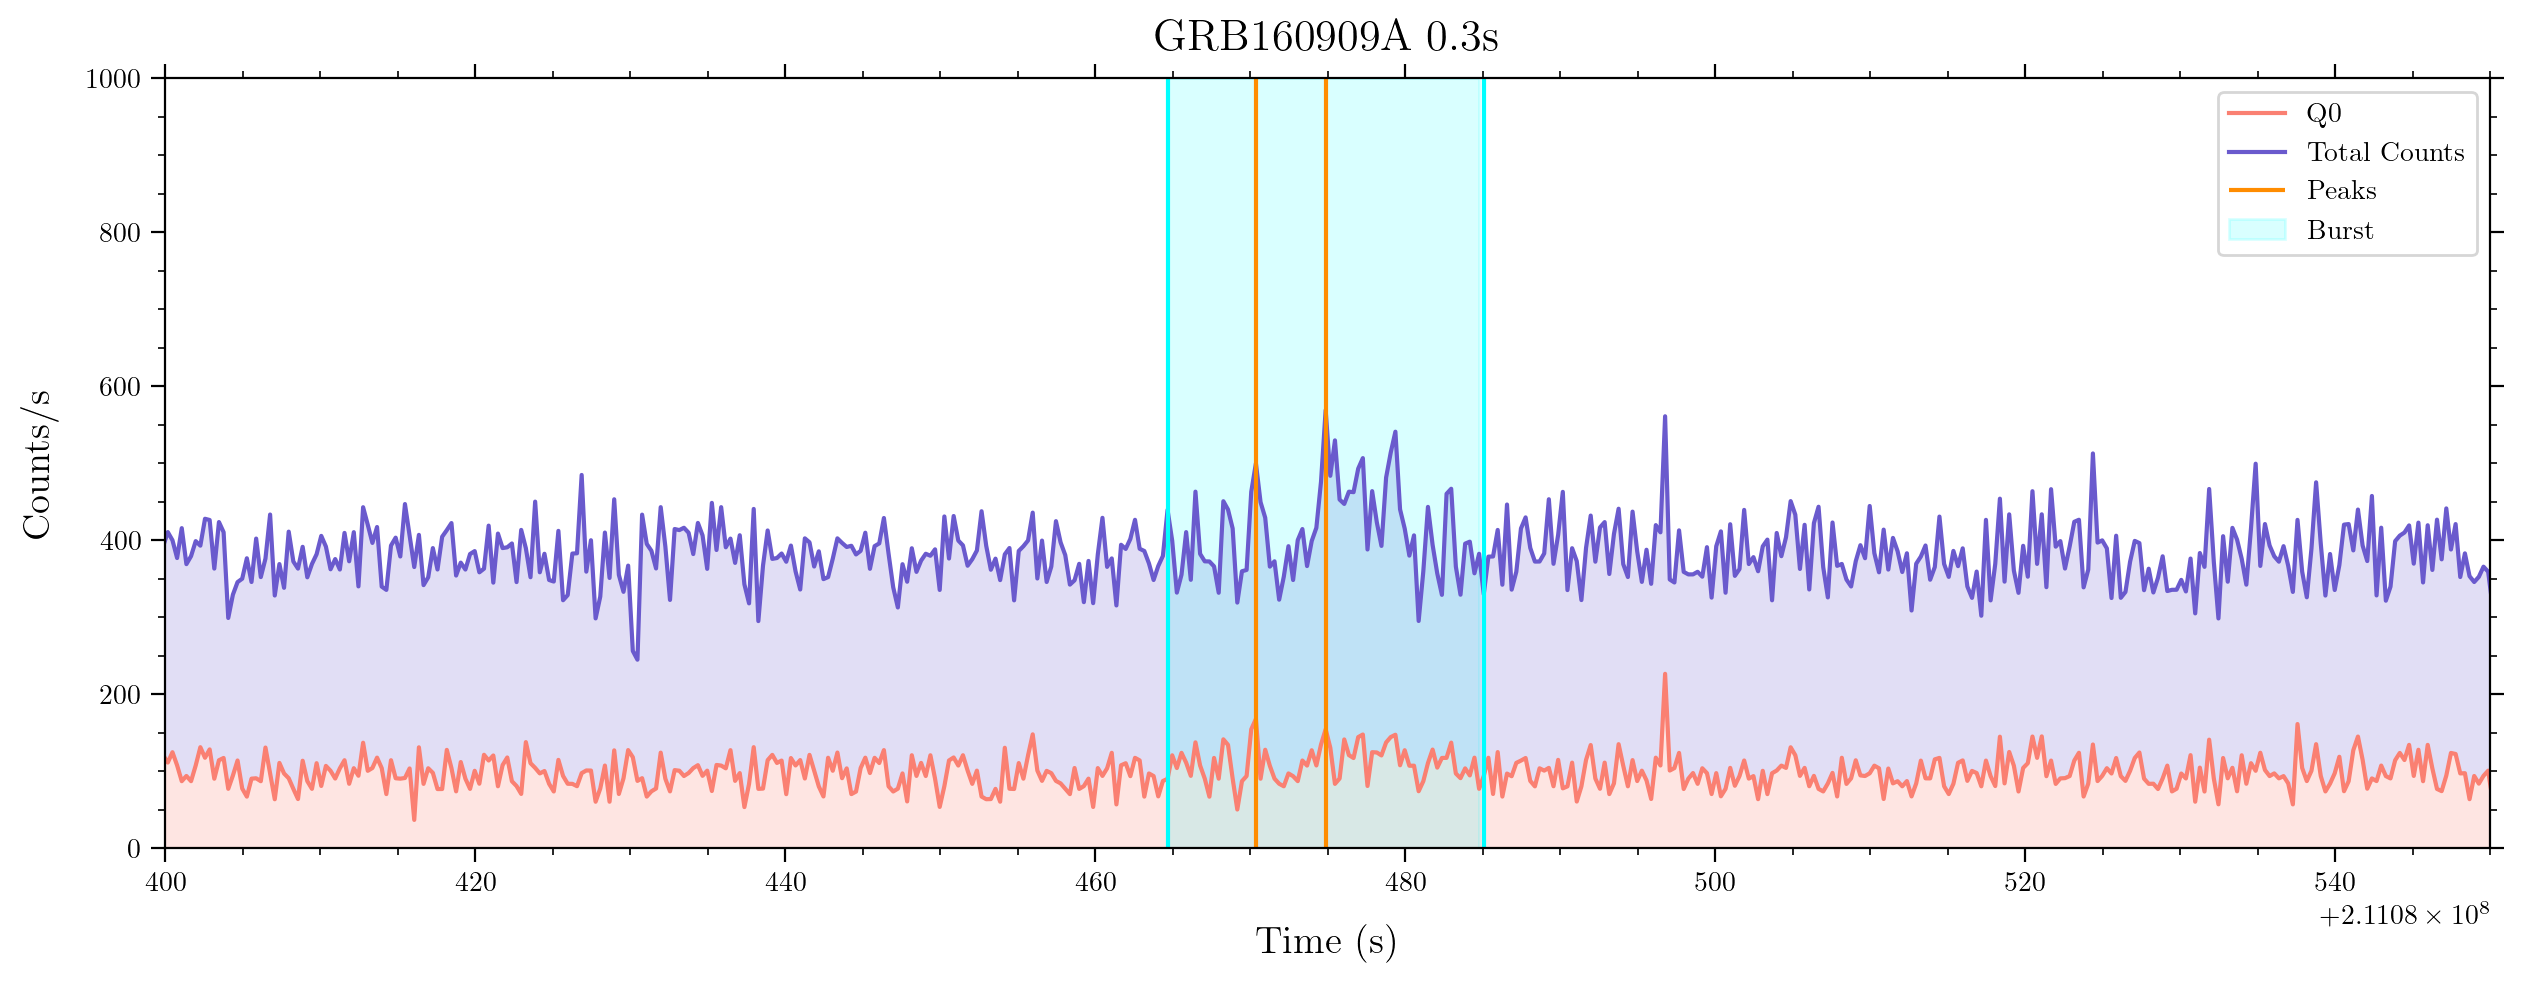

In [25]:
plt.figure(figsize=(15,5), dpi=200)
plt.plot(lc1_03_data['TIME'],lc1_03_data['RATE'], label='Q0', color='salmon')
plt.plot(total_lc_03_data['TIME'],total_counts_03, label='Total Counts', color = 'slateblue')
plt.xlim(211080400, 211080550)
plt.ylim(0, 1000)
plt.vlines(total_lc_03_data['TIME'][start_03], 0, 1000, color='cyan')
plt.vlines(total_lc_03_data['TIME'][end_03], 0, 1000, color='cyan')
plt.vlines(total_lc_03_data['TIME'][max_03], 0, 1000, color='darkorange', label='Peaks')
plt.vlines(total_lc_03_data['TIME'][max_03-15], 0, 1000, color='darkorange')
plt.fill_between(total_lc_03_data['TIME'], lc1_03_data['RATE'], total_counts_03, color='slateblue', alpha=0.2)
plt.fill_between(total_lc_03_data['TIME'], 0, lc1_03_data['RATE'], color='salmon', alpha=0.2)
plt.fill_between(total_lc_03_data['TIME'][start_03:end_03],1000, color='cyan', alpha=0.15, label="Burst")
plt.xlabel('Time (s)', labelpad=10, fontsize=14)
plt.ylabel('Counts/s', labelpad=10, fontsize=14)
plt.title('GRB160909A 0.3s', fontsize=16, pad=10)
plt.legend()
plt.show()

In [26]:
snr_gauss_03, *_, popt_gauss_03 = pf.snr_gauss(total_lc_03, start_03, end_03, in_bins=400, window=801)
snr_gamma_03, *_, popt_gamma_03 = pf.snr_gamma(total_lc_03, start_03, end_03, in_bins=400, window=801)
snr_skewnorm_03, *_, popt_skewnorm_03 = pf.snr_skewnorm(total_lc_03, start_03, end_03, in_bins=400, window=801)
snr_poisson_03, *_, popt_poisson_03 = pf.snr_poisson(total_lc_03, start_03, end_03, in_bins=400, window=801)
snr_counts_03 = pf.snr_counts(total_lc_03, start_03, end_03, window=801)

In [27]:
print("SNR for Gaussian Fit: ", snr_gauss_03)
print("SNR for Gamma Fit: ", snr_gamma_03)
print("SNR for Skewnorm Fit: ", snr_skewnorm_03)
print("SNR for Poisson Fit: ", snr_poisson_03)
print("SNR for Counts: ", snr_counts_03)

SNR for Gaussian Fit:  1.2397016243378487
SNR for Gamma Fit:  1.8172883311425347
SNR for Skewnorm Fit:  1.0910816191630133
SNR for Poisson Fit:  1.0068388548892373
SNR for Counts:  1.5346757546379848


# **0.4s**

In [28]:
lc1_04 = '/home/ravioli/astro/ksp/grb/GRB160909A/04s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q0.lc'
lc2_04 = '/home/ravioli/astro/ksp/grb/GRB160909A/04s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q1.lc'
lc3_04 = '/home/ravioli/astro/ksp/grb/GRB160909A/04s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q2.lc'
lc4_04 = '/home/ravioli/astro/ksp/grb/GRB160909A/04s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q3.lc'

lc1_04_data = pf.openlc(lc1_04)
lc2_04_data = pf.openlc(lc2_04)
lc3_04_data = pf.openlc(lc3_04)
lc4_04_data = pf.openlc(lc4_04)

total_counts_04 = lc1_04_data['RATE'] + lc2_04_data['RATE'] + lc3_04_data['RATE'] + lc4_04_data['RATE']
total_lc_04 = '/home/ravioli/astro/ksp/grb/GRB160909A/04s/GRB160909A-total-counts.lc'
total_lc_04_data = pf.openlc(total_lc_04)

In [29]:
# hdu = fits.open(lc1_04)
# hdr = hdu[1].header
# data = hdu[1].data
# data['RATE'] = total_counts_04
# hdu.writeto('/home/ravioli/astro/ksp/grb/GRB160909A/04s/GRB160909A-total-counts.lc', overwrite=True)
# hdu.close()

In [30]:
max_04 = np.where(total_counts_04 == np.max(total_counts_04[1890:2390]))[0][0]
start_04 = max_04-30
end_04 = max_04+17

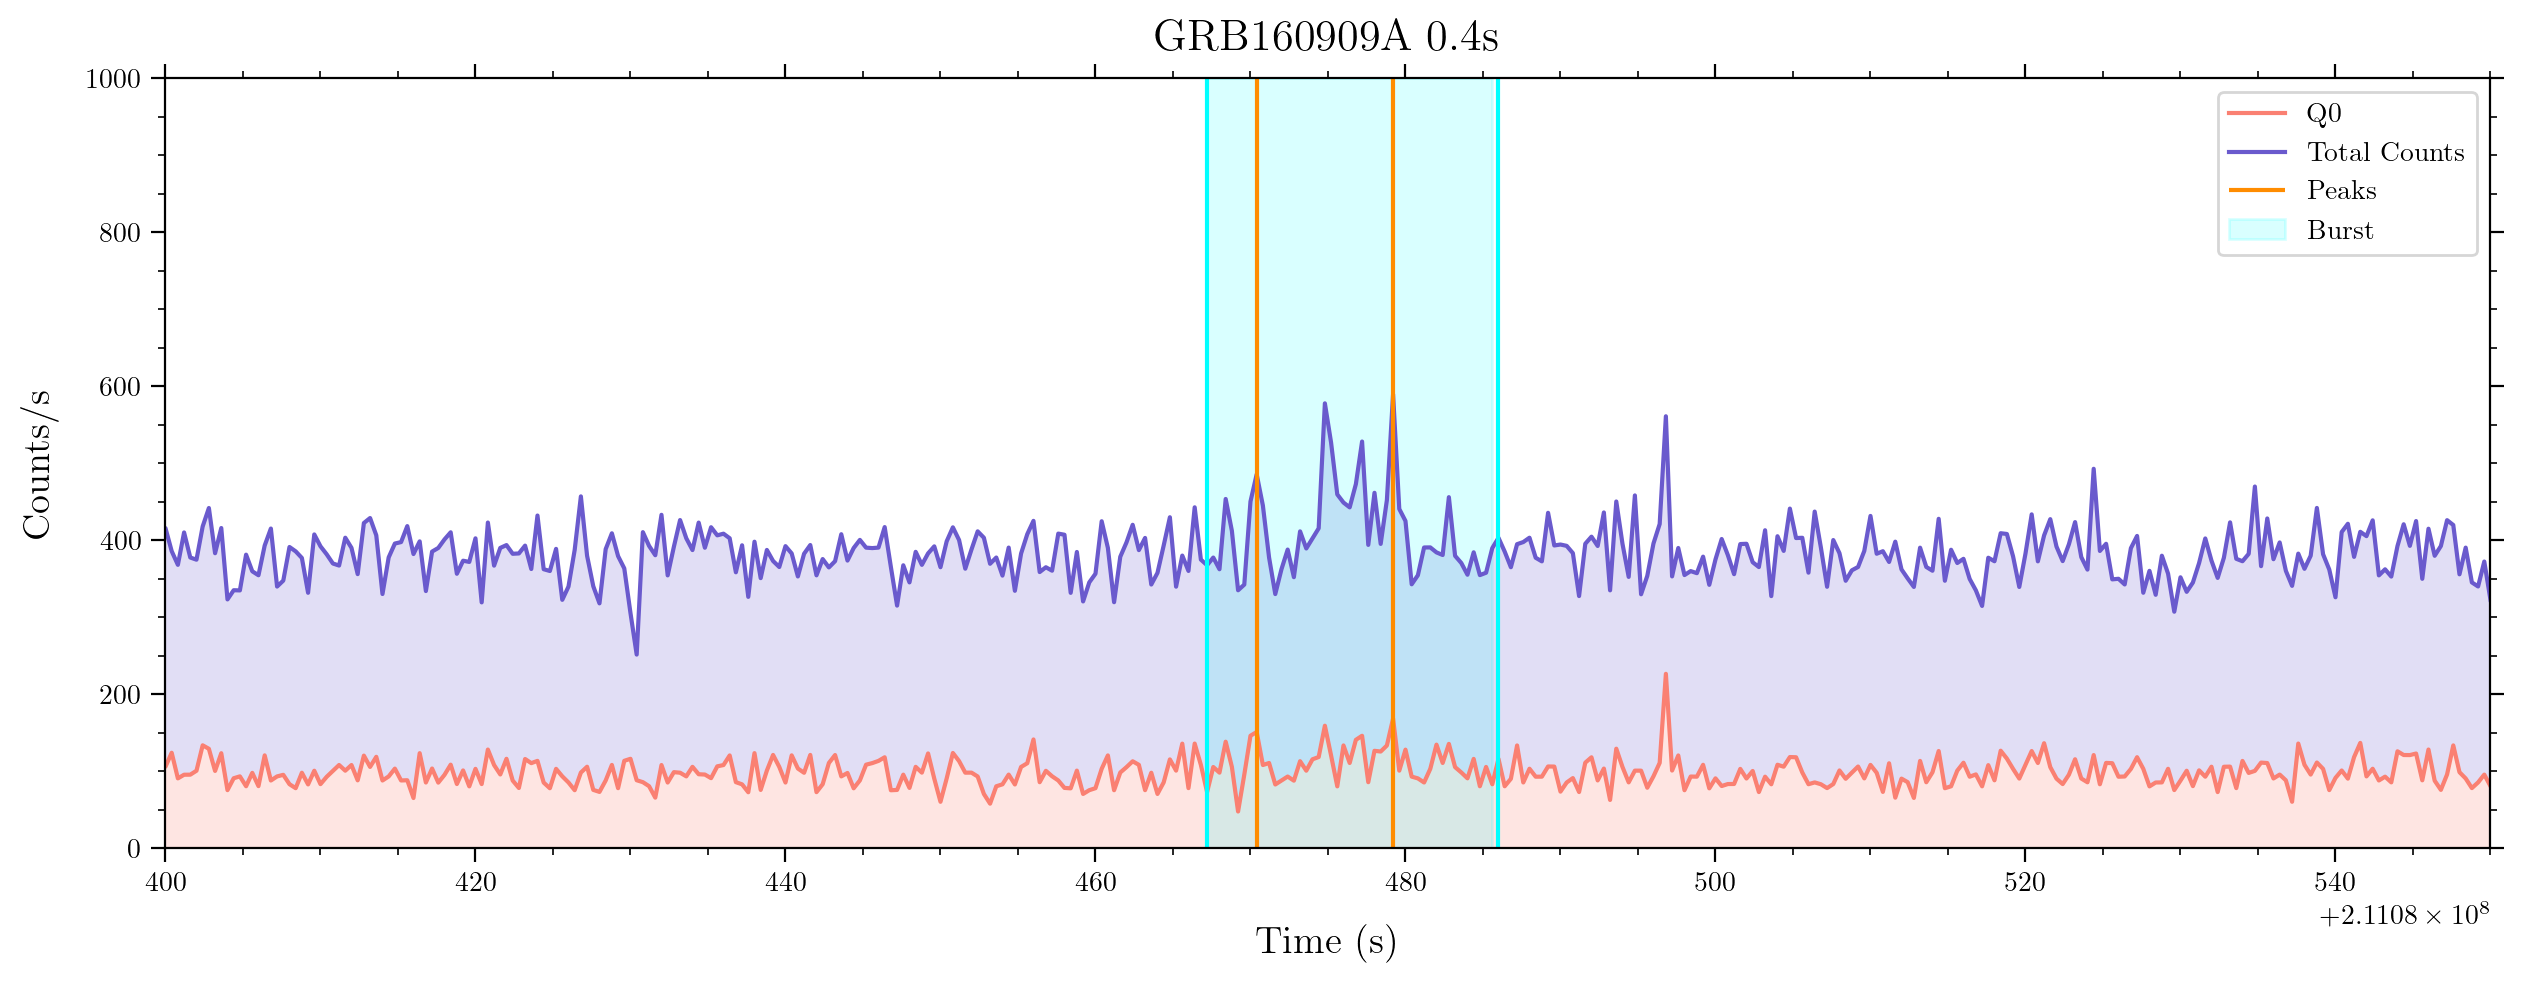

In [31]:
plt.figure(figsize=(15,5), dpi=200)
plt.plot(lc1_04_data['TIME'],lc1_04_data['RATE'], label='Q0', color='salmon')
plt.plot(total_lc_04_data['TIME'],total_counts_04, label='Total Counts', color = 'slateblue')
plt.xlim(211080400, 211080550)
plt.ylim(0, 1000)
plt.vlines(total_lc_04_data['TIME'][start_04], 0, 1000, color='cyan')
plt.vlines(total_lc_04_data['TIME'][end_04], 0, 1000, color='cyan')
plt.vlines(total_lc_04_data['TIME'][max_04], 0, 1000, color='darkorange', label='Peaks')
plt.vlines(total_lc_04_data['TIME'][max_04-22], 0, 1000, color='darkorange')
plt.fill_between(total_lc_04_data['TIME'], lc1_04_data['RATE'], total_counts_04, color='slateblue', alpha=0.2)
plt.fill_between(total_lc_04_data['TIME'], 0, lc1_04_data['RATE'], color='salmon', alpha=0.2)
plt.fill_between(total_lc_04_data['TIME'][start_04:end_04],1000, color='cyan', alpha=0.15, label="Burst")
plt.xlabel('Time (s)', labelpad=10, fontsize=14)
plt.ylabel('Counts/s', labelpad=10, fontsize=14)
plt.title('GRB160909A 0.4s', fontsize=16, pad=10)
plt.legend()
plt.show()

In [32]:
snr_gauss_04, *_, popt_gauss_04 = pf.snr_gauss(total_lc_04, start_04, end_04, in_bins=350, window=701)
snr_gamma_04, *_, popt_gamma_04 = pf.snr_gamma(total_lc_04, start_04, end_04, in_bins=350, window=701)
snr_skewnorm_04, *_, popt_skewnorm_04 = pf.snr_skewnorm(total_lc_04, start_04, end_04, in_bins=350, window=701)
snr_poisson_04, *_, popt_poisson_04 = pf.snr_poisson(total_lc_04, start_04, end_04, in_bins=350, window=701)
snr_counts_04 = pf.snr_counts(total_lc_04, start_04, end_04, window=701)

In [33]:
print("SNR for Gaussian Fit: ", snr_gauss_04)
print("SNR for Gamma Fit: ", snr_gamma_04)
print("SNR for Skewnorm Fit: ", snr_skewnorm_04)
print("SNR for Poisson Fit: ", snr_poisson_04)
print("SNR for Counts: ", snr_counts_04)

SNR for Gaussian Fit:  1.6307970099073508
SNR for Gamma Fit:  1.3631144818109255
SNR for Skewnorm Fit:  1.6034859151518097
SNR for Poisson Fit:  1.0357269119724883
SNR for Counts:  1.7657659806018626


# **0.5s**

In [34]:
lc1_05 = '/home/ravioli/astro/ksp/grb/GRB160909A/05s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q0.lc'
lc2_05 = '/home/ravioli/astro/ksp/grb/GRB160909A/05s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q1.lc'
lc3_05 = '/home/ravioli/astro/ksp/grb/GRB160909A/05s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q2.lc'
lc4_05 = '/home/ravioli/astro/ksp/grb/GRB160909A/05s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q3.lc'

lc1_05_data = pf.openlc(lc1_05)
lc2_05_data = pf.openlc(lc2_05)
lc3_05_data = pf.openlc(lc3_05)
lc4_05_data = pf.openlc(lc4_05)

total_counts_05 = lc1_05_data['RATE'] + lc2_05_data['RATE'] + lc3_05_data['RATE'] + lc4_05_data['RATE']
total_lc_05 = '/home/ravioli/astro/ksp/grb/GRB160909A/05s/GRB160909A-total-counts.lc'
total_lc_05_data = pf.openlc(total_lc_05)

In [35]:
# hdu = fits.open(lc1_05)
# hdr = hdu[1].header
# data = hdu[1].data
# data['RATE'] = total_counts_05
# hdu.writeto('/home/ravioli/astro/ksp/grb/GRB160909A/05s/GRB160909A-total-counts.lc', overwrite=True)
# hdu.close()

In [36]:
max_05 = np.where(total_counts_05 == np.max(total_counts_05[1510:2010]))[0][0]
start_05 = max_05-27
end_05 = max_05+15

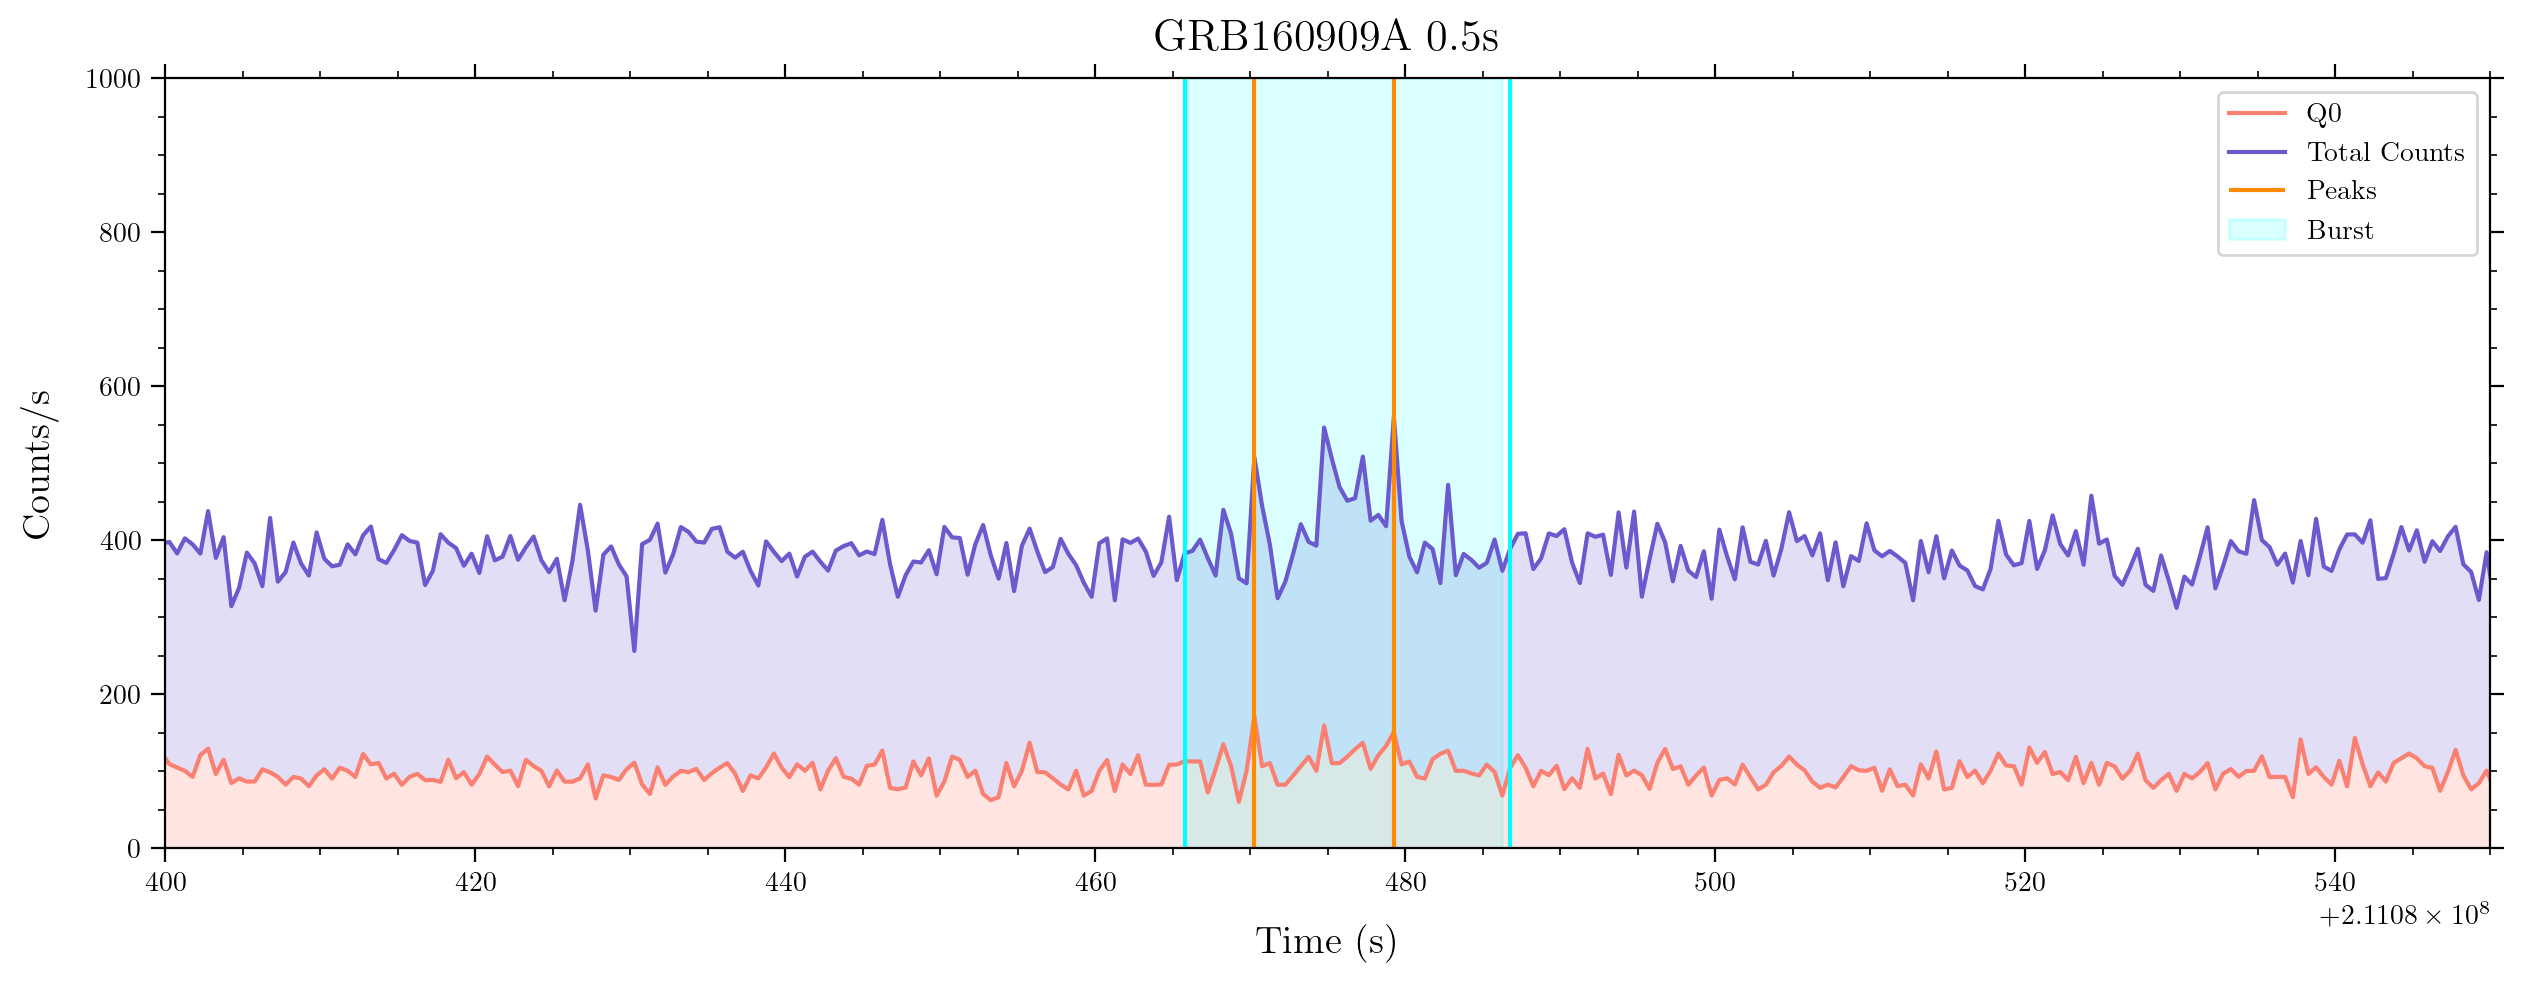

In [37]:
plt.figure(figsize=(15,5), dpi=200)
plt.plot(lc1_05_data['TIME'],lc1_05_data['RATE'], label='Q0', color='salmon')
plt.plot(total_lc_05_data['TIME'],total_counts_05, label='Total Counts', color = 'slateblue')
plt.xlim(211080400, 211080550)
plt.ylim(0, 1000)
plt.vlines(total_lc_05_data['TIME'][start_05], 0, 1000, color='cyan')
plt.vlines(total_lc_05_data['TIME'][end_05], 0, 1000, color='cyan')
plt.vlines(total_lc_05_data['TIME'][max_05], 0, 1000, color='darkorange', label='Peaks')
plt.vlines(total_lc_05_data['TIME'][max_05-18], 0, 1000, color='darkorange')
plt.fill_between(total_lc_05_data['TIME'], lc1_05_data['RATE'], total_counts_05, color='slateblue', alpha=0.2)
plt.fill_between(total_lc_05_data['TIME'], 0, lc1_05_data['RATE'], color='salmon', alpha=0.2)
plt.fill_between(total_lc_05_data['TIME'][start_05:end_05],1000, color='cyan', alpha=0.15, label="Burst")
plt.xlabel('Time (s)', labelpad=10, fontsize=14)
plt.ylabel('Counts/s', labelpad=10, fontsize=14)
plt.title('GRB160909A 0.5s', fontsize=16, pad=10)
plt.legend()
plt.show()

In [38]:
snr_gauss_05, *_, popt_gauss_05 = pf.snr_gauss(total_lc_05, start_05, end_05, in_bins=300, window=601)
snr_gamma_05, *_, popt_gamma_05 = pf.snr_gamma(total_lc_05, start_05, end_05, in_bins=300, window=601)
snr_skewnorm_05, *_, popt_skewnorm_05 = pf.snr_skewnorm(total_lc_05, start_05, end_05, in_bins=300, window=601)
snr_poisson_05, *_, popt_poisson_05 = pf.snr_poisson(total_lc_05, start_05, end_05, in_bins=300, window=601)
snr_counts_05 = pf.snr_counts(total_lc_05, start_05, end_05, window=601)

In [39]:
print("SNR for Gaussian Fit: ", snr_gauss_05)
print("SNR for Gamma Fit: ", snr_gamma_05)
print("SNR for Skewnorm Fit: ", snr_skewnorm_05)
print("SNR for Poisson Fit: ", snr_poisson_05)
print("SNR for Counts: ", snr_counts_05)

SNR for Gaussian Fit:  1.4695121820416928
SNR for Gamma Fit:  1.1023337287209074
SNR for Skewnorm Fit:  1.5162417954440581
SNR for Poisson Fit:  1.0361870824060468
SNR for Counts:  1.8947333903031267


# **0.6s**

In [40]:
lc1_06 = '/home/ravioli/astro/ksp/grb/GRB160909A/06s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q0.lc'
lc2_06 = '/home/ravioli/astro/ksp/grb/GRB160909A/06s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q1.lc'
lc3_06 = '/home/ravioli/astro/ksp/grb/GRB160909A/06s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q2.lc'
lc4_06 = '/home/ravioli/astro/ksp/grb/GRB160909A/06s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q3.lc'

lc1_06_data = pf.openlc(lc1_06)
lc2_06_data = pf.openlc(lc2_06)
lc3_06_data = pf.openlc(lc3_06)
lc4_06_data = pf.openlc(lc4_06)

total_counts_06 = lc1_06_data['RATE'] + lc2_06_data['RATE'] + lc3_06_data['RATE'] + lc4_06_data['RATE']
total_lc_06 = '/home/ravioli/astro/ksp/grb/GRB160909A/06s/GRB160909A-total-counts.lc'
total_lc_06_data = pf.openlc(total_lc_06)

In [41]:
# hdu = fits.open(lc1_06)
# hdr = hdu[1].header
# data = hdu[1].data
# data['RATE'] = total_counts_06
# hdu.writeto('/home/ravioli/astro/ksp/grb/GRB160909A/06s/GRB160909A-total-counts.lc', overwrite=True)
# hdu.close()

In [112]:
max_06 = np.where(total_counts_06 == np.max(total_counts_06[1260:1760]))[0][0]
start_06 = max_06-13
end_06 = max_06+17
print(start_06, end_06)

1376 1406


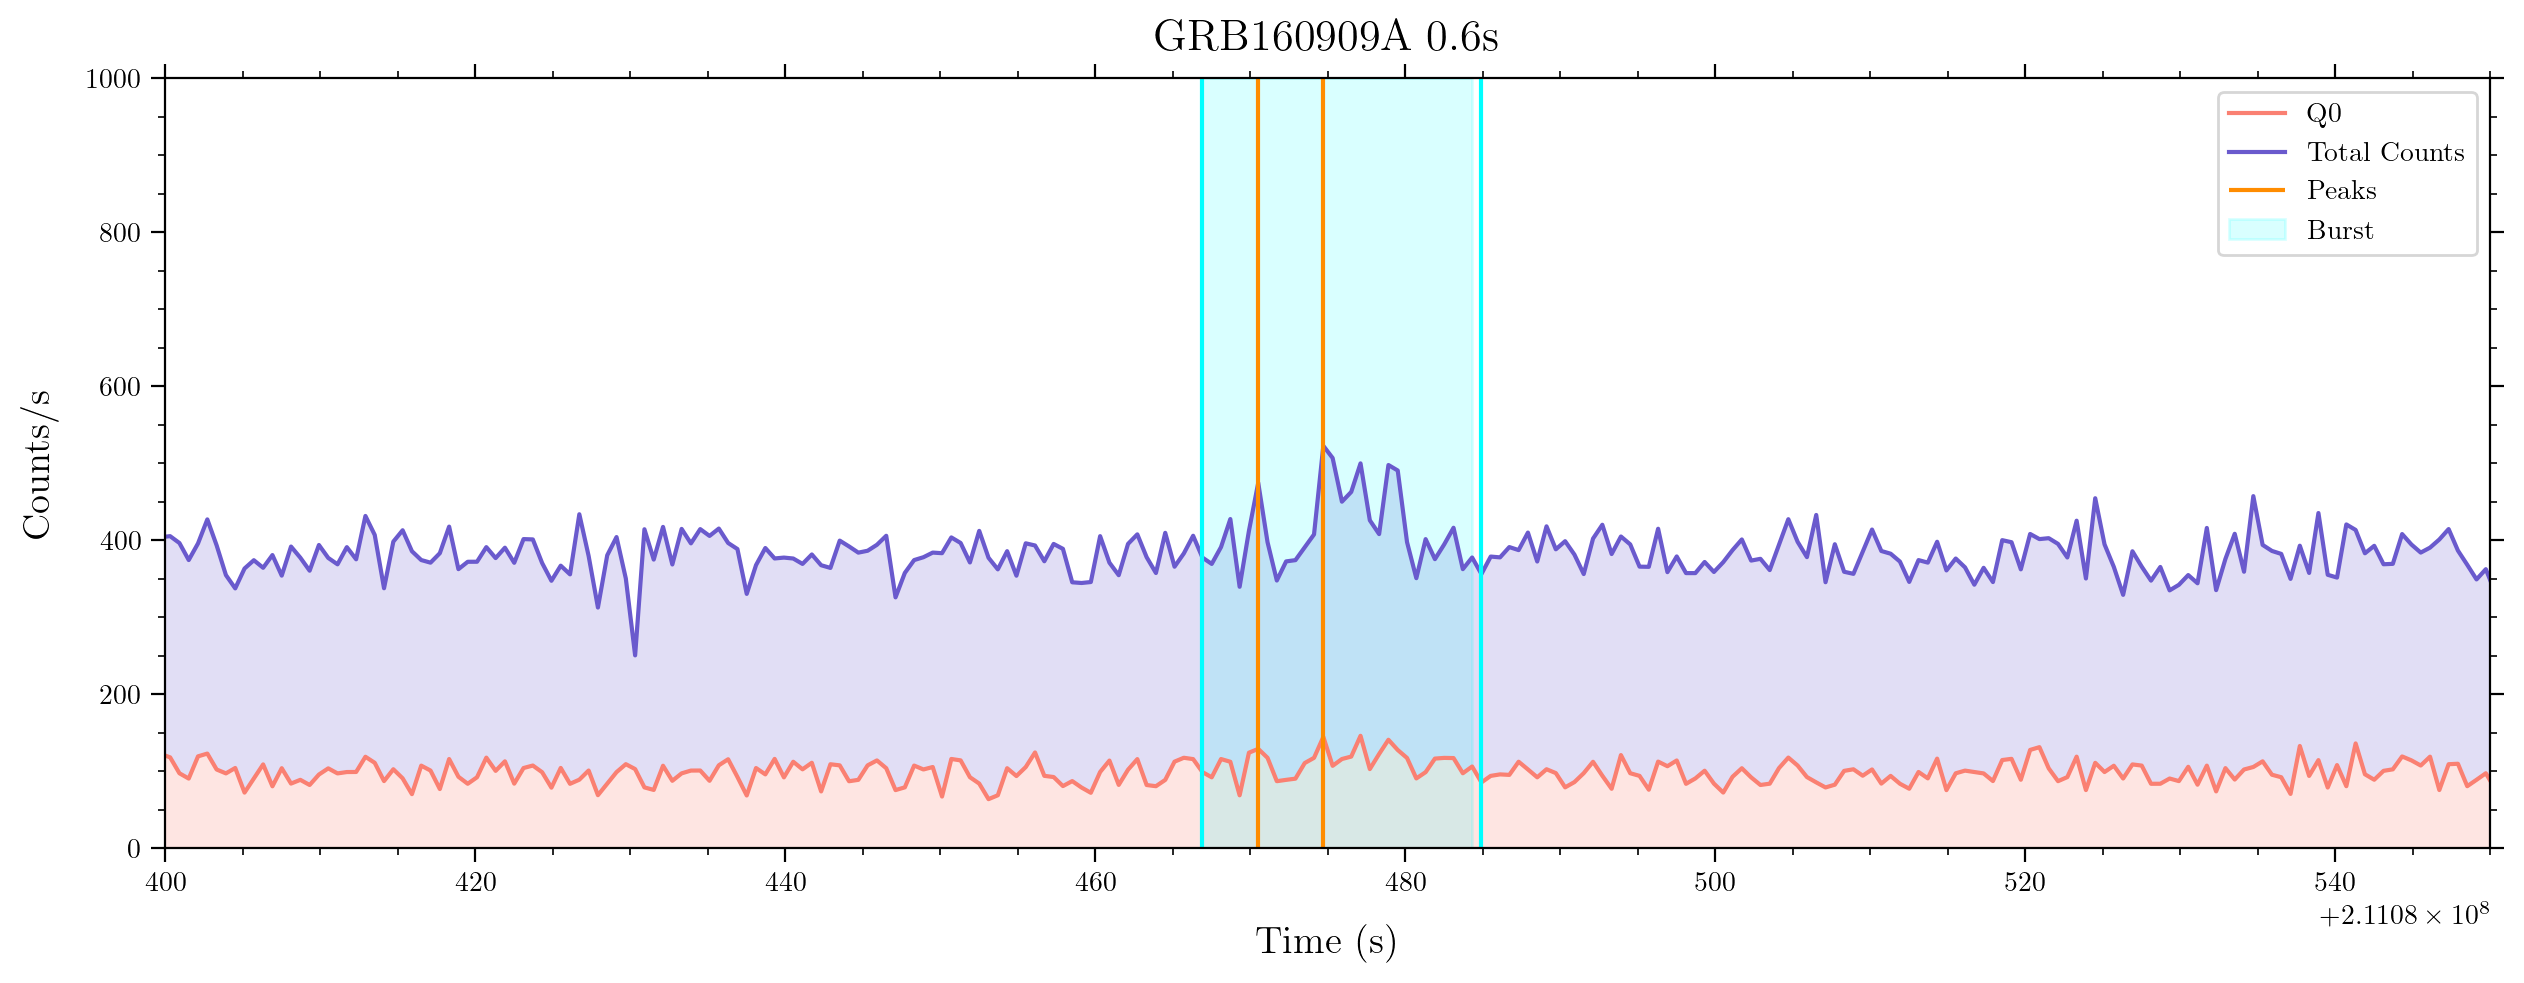

In [43]:
plt.figure(figsize=(15,5), dpi=200)
plt.plot(lc1_06_data['TIME'],lc1_06_data['RATE'], label='Q0', color='salmon')
plt.plot(total_lc_06_data['TIME'],total_counts_06, label='Total Counts', color = 'slateblue')
plt.xlim(211080400, 211080550)
plt.ylim(0, 1000)
plt.vlines(total_lc_06_data['TIME'][start_06], 0, 1000, color='cyan')
plt.vlines(total_lc_06_data['TIME'][end_06], 0, 1000, color='cyan')
plt.vlines(total_lc_06_data['TIME'][max_06], 0, 1000, color='darkorange', label='Peaks')
plt.vlines(total_lc_06_data['TIME'][max_06-7], 0, 1000, color='darkorange')
plt.fill_between(total_lc_06_data['TIME'], lc1_06_data['RATE'], total_counts_06, color='slateblue', alpha=0.2)
plt.fill_between(total_lc_06_data['TIME'], 0, lc1_06_data['RATE'], color='salmon', alpha=0.2)
plt.fill_between(total_lc_06_data['TIME'][start_06:end_06],1000, color='cyan', alpha=0.15, label="Burst")
plt.xlabel('Time (s)', labelpad=10, fontsize=14)
plt.ylabel('Counts/s', labelpad=10, fontsize=14)
plt.title('GRB160909A 0.6s', fontsize=16, pad=10)
plt.legend()
plt.show()

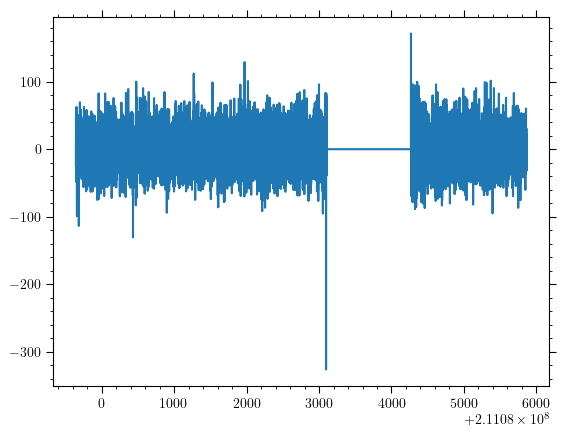

In [95]:
data, *_ = pf.filter_and_detrend(total_lc_06, start_06, end_06, window=int(101/0.6))
plt.plot(data['TIME'], data['RATE'])

In [97]:
snr_gauss_06, *_, popt_gauss_06 = pf.snr_gauss(total_lc_06, start_06, end_06, in_bins=250, window=int(101/0.6))
snr_gamma_06, n, bin_center, fit, popt_gamma_06 = pf.snr_gamma(total_lc_06, start_06, end_06, in_bins=250, window=int(101/0.6))
snr_skewnorm_06, *_, popt_skewnorm_06 = pf.snr_skewnorm(total_lc_06, start_06, end_06, in_bins=250, window=int(101/0.6))
snr_poisson_06, *_, popt_poisson_06 = pf.snr_poisson(total_lc_06, start_06, end_06, in_bins=250, window=int(101/0.6))
snr_counts_06 = pf.snr_counts(total_lc_06, start_06, end_06, window=501)

In [98]:
print("SNR for Gaussian Fit: ", snr_gauss_06)
print("SNR for Gamma Fit: ", snr_gamma_06)
print("SNR for Skewnorm Fit: ", snr_skewnorm_06)
print("SNR for Poisson Fit: ", snr_poisson_06)
print("SNR for Counts: ", snr_counts_06)

SNR for Gaussian Fit:  1.1796620606015662
SNR for Gamma Fit:  1.0057290174088565
SNR for Skewnorm Fit:  1.1754266456850997
SNR for Poisson Fit:  1.0149050112470983
SNR for Counts:  1.9262950076944694


# **0.7s**

In [46]:
lc1_07 = '/home/ravioli/astro/ksp/grb/GRB160909A/07s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q0.lc'
lc2_07 = '/home/ravioli/astro/ksp/grb/GRB160909A/07s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q1.lc'
lc3_07 = '/home/ravioli/astro/ksp/grb/GRB160909A/07s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q2.lc'
lc4_07 = '/home/ravioli/astro/ksp/grb/GRB160909A/07s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q3.lc'

lc1_07_data = pf.openlc(lc1_07)
lc2_07_data = pf.openlc(lc2_07)
lc3_07_data = pf.openlc(lc3_07)
lc4_07_data = pf.openlc(lc4_07)

total_counts_07 = lc1_07_data['RATE'] + lc2_07_data['RATE'] + lc3_07_data['RATE'] + lc4_07_data['RATE']
total_lc_07 = '/home/ravioli/astro/ksp/grb/GRB160909A/07s/GRB160909A-total-counts.lc'
total_lc_07_data = pf.openlc(total_lc_07)

In [47]:
# hdu = fits.open(lc1_07)
# hdr = hdu[1].header
# data = hdu[1].data
# data['RATE'] = total_counts_07
# hdu.writeto('/home/ravioli/astro/ksp/grb/GRB160909A/07s/GRB160909A-total-counts.lc', overwrite=True)
# hdu.close()

In [110]:
max_07 = np.where(total_counts_07 == np.max(total_counts_07[1010:1510]))[0][0]
start_07 = max_07-12
end_07 = max_07+13
print(start_07, end_07)

1179 1204


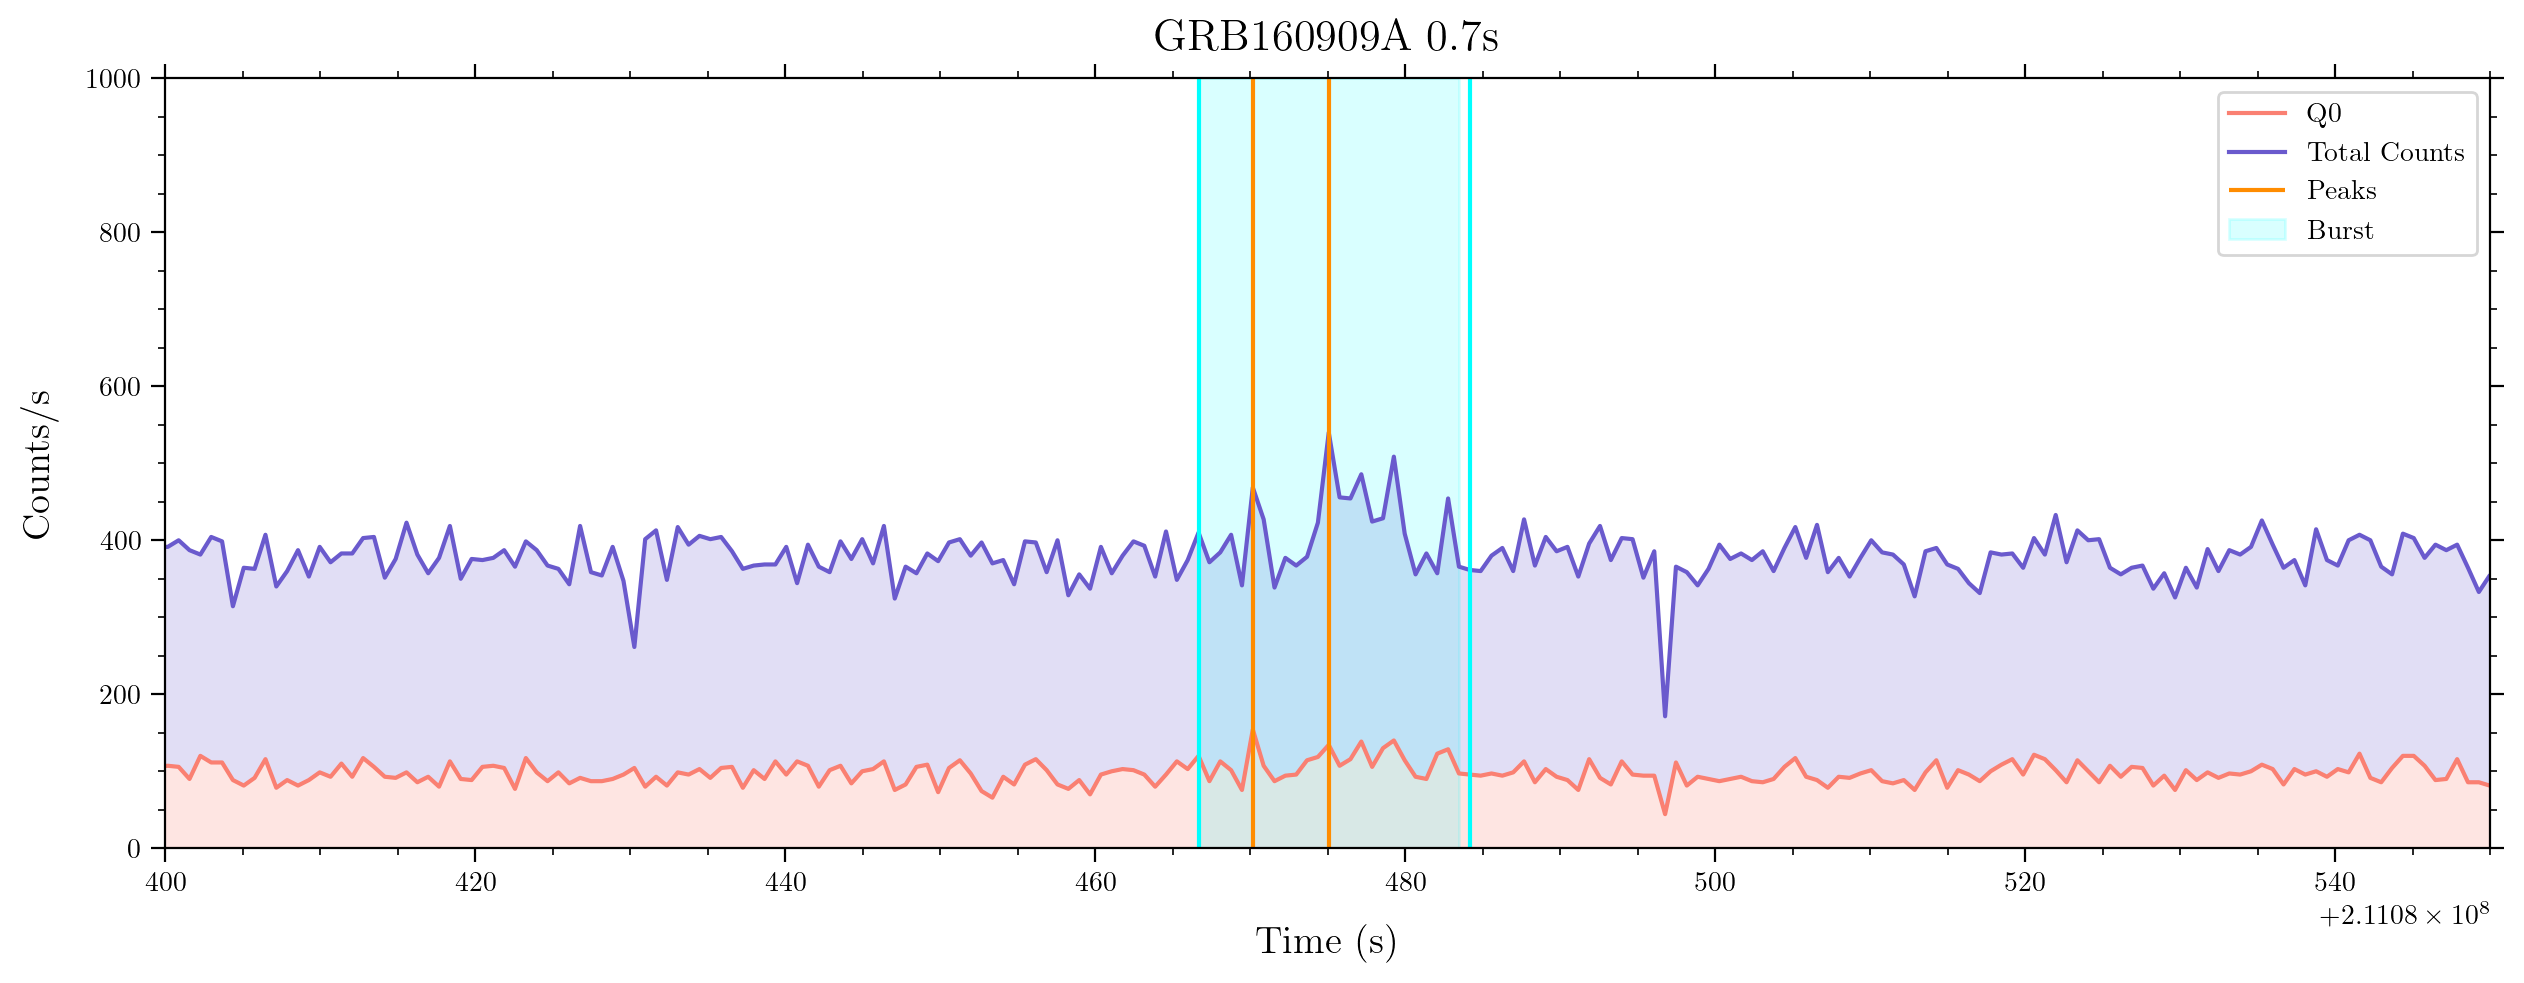

In [49]:
plt.figure(figsize=(15,5), dpi=200)
plt.plot(lc1_07_data['TIME'],lc1_07_data['RATE'], label='Q0', color='salmon')
plt.plot(total_lc_07_data['TIME'],total_counts_07, label='Total Counts', color = 'slateblue')
plt.xlim(211080400, 211080550)
plt.ylim(0, 1000)
plt.vlines(total_lc_07_data['TIME'][start_07], 0, 1000, color='cyan')
plt.vlines(total_lc_07_data['TIME'][end_07], 0, 1000, color='cyan')
plt.vlines(total_lc_07_data['TIME'][max_07], 0, 1000, color='darkorange', label='Peaks')
plt.vlines(total_lc_07_data['TIME'][max_07-7], 0, 1000, color='darkorange')
plt.fill_between(total_lc_07_data['TIME'], lc1_07_data['RATE'], total_counts_07, color='slateblue', alpha=0.2)
plt.fill_between(total_lc_07_data['TIME'], 0, lc1_07_data['RATE'], color='salmon', alpha=0.2)
plt.fill_between(total_lc_07_data['TIME'][start_07:end_07],1000, color='cyan', alpha=0.15, label="Burst")
plt.xlabel('Time (s)', labelpad=10, fontsize=14)
plt.ylabel('Counts/s', labelpad=10, fontsize=14)
plt.title('GRB160909A 0.7s', fontsize=16, pad=10)
plt.legend()
plt.show()

In [102]:
snr_gauss_07, *_, popt_gauss_07 = pf.snr_gauss(total_lc_07, start_07, end_07, in_bins=200, window=int(101/0.7))
snr_gamma_07, *_, popt_gamma_07 = pf.snr_gamma(total_lc_07, start_07, end_07, in_bins=200, window=int(101/0.7))
snr_skewnorm_07, *_, popt_skewnorm_07 = pf.snr_skewnorm(total_lc_07, start_07, end_07, in_bins=200, window=int(101/0.7))
snr_poisson_07, *_, popt_poisson_07 = pf.snr_poisson(total_lc_07, start_07, end_07, in_bins=200, window=int(101/0.7))
snr_counts_07 = pf.snr_counts(total_lc_07, start_07, end_07, window=int(101/0.7))

In [103]:
print("SNR for Gaussian Fit: ", snr_gauss_07)
print("SNR for Gamma Fit: ", snr_gamma_07)
print("SNR for Skewnorm Fit: ", snr_skewnorm_07)
print("SNR for Poisson Fit: ", snr_poisson_07)
print("SNR for Counts: ", snr_counts_07)

SNR for Gaussian Fit:  1.5658146856161665
SNR for Gamma Fit:  0.8384995133250385
SNR for Skewnorm Fit:  1.4219902991052367
SNR for Poisson Fit:  1.0201847191822808
SNR for Counts:  1.8730031524395985


# **0.8s**

In [52]:
lc1_08 = '/home/ravioli/astro/ksp/grb/GRB160909A/08s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q0.lc'
lc2_08 = '/home/ravioli/astro/ksp/grb/GRB160909A/08s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q1.lc'
lc3_08 = '/home/ravioli/astro/ksp/grb/GRB160909A/08s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q2.lc'
lc4_08 = '/home/ravioli/astro/ksp/grb/GRB160909A/08s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q3.lc'

lc1_08_data = pf.openlc(lc1_08)
lc2_08_data = pf.openlc(lc2_08)
lc3_08_data = pf.openlc(lc3_08)
lc4_08_data = pf.openlc(lc4_08)

total_counts_08 = lc1_08_data['RATE'] + lc2_08_data['RATE'] + lc3_08_data['RATE'] + lc4_08_data['RATE']
total_lc_08 = '/home/ravioli/astro/ksp/grb/GRB160909A/08s/GRB160909A-total-counts.lc'
total_lc_08_data = pf.openlc(total_lc_08)

In [53]:
# hdu = fits.open(lc1_08)
# hdr = hdu[1].header
# data = hdu[1].data
# data['RATE'] = total_counts_08
# hdu.writeto('/home/ravioli/astro/ksp/grb/GRB160909A/08s/GRB160909A-total-counts.lc', overwrite=True)
# hdu.close()

In [114]:
max_08 = np.where(total_counts_08 == np.max(total_counts_08[760:1260]))[0][0]
start_08 = max_08-12
end_08 = max_08+12
print(start_08, end_08)

1030 1054


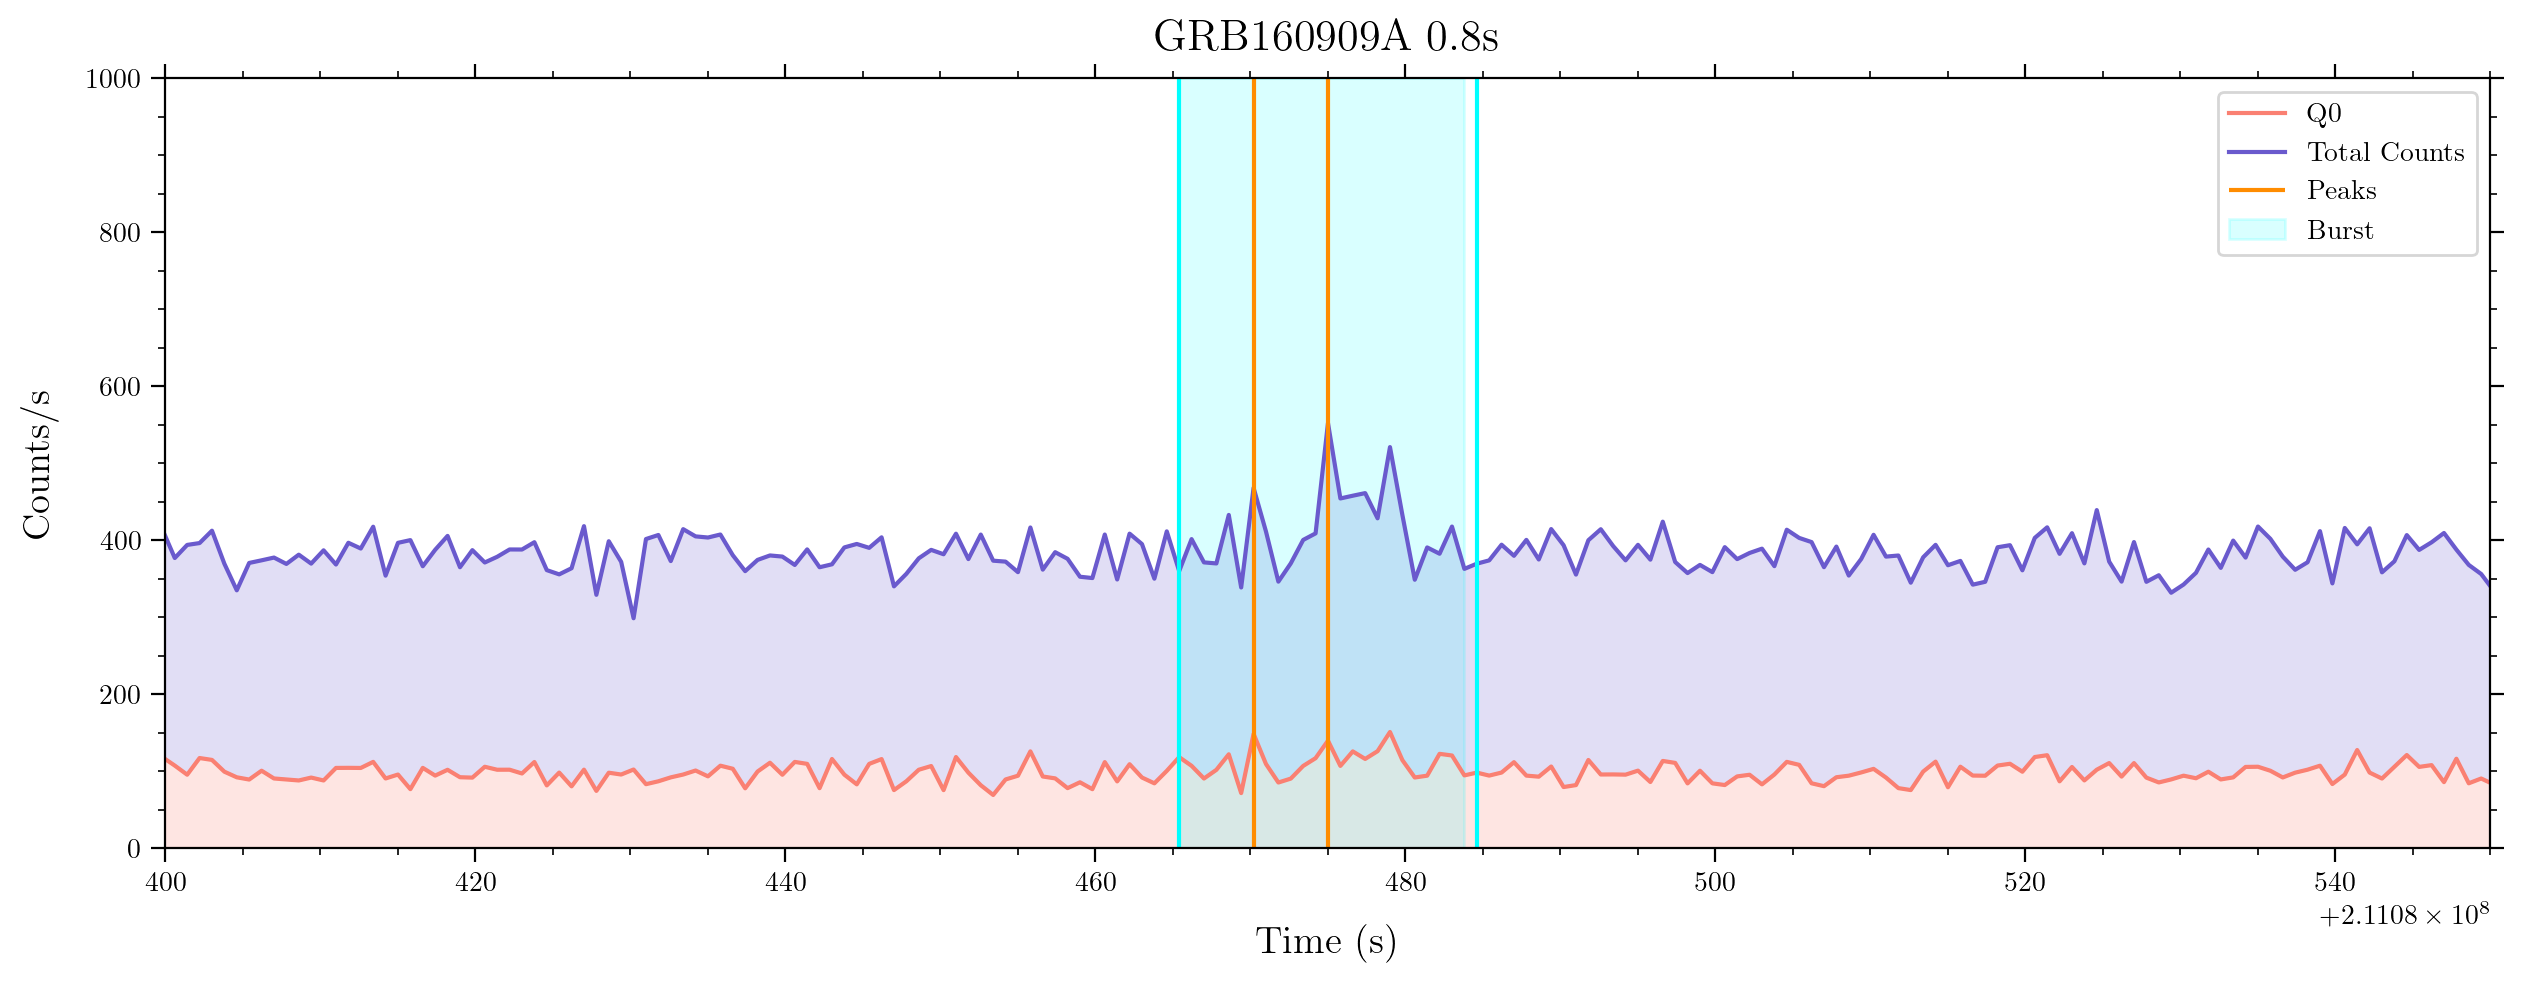

In [55]:
plt.figure(figsize=(15,5), dpi=200)
plt.plot(lc1_08_data['TIME'],lc1_08_data['RATE'], label='Q0', color='salmon')
plt.plot(total_lc_08_data['TIME'],total_counts_08, label='Total Counts', color = 'slateblue')
plt.xlim(211080400, 211080550)
plt.ylim(0, 1000)
plt.vlines(total_lc_08_data['TIME'][start_08], 0, 1000, color='cyan')
plt.vlines(total_lc_08_data['TIME'][end_08], 0, 1000, color='cyan')
plt.vlines(total_lc_08_data['TIME'][max_08], 0, 1000, color='darkorange', label='Peaks')
plt.vlines(total_lc_08_data['TIME'][max_08-6], 0, 1000, color='darkorange')
plt.fill_between(total_lc_08_data['TIME'], lc1_08_data['RATE'], total_counts_08, color='slateblue', alpha=0.2)
plt.fill_between(total_lc_08_data['TIME'], 0, lc1_08_data['RATE'], color='salmon', alpha=0.2)
plt.fill_between(total_lc_08_data['TIME'][start_08:end_08],1000, color='cyan', alpha=0.15, label="Burst")
plt.xlabel('Time (s)', labelpad=10, fontsize=14)
plt.ylabel('Counts/s', labelpad=10, fontsize=14)
plt.title('GRB160909A 0.8s', fontsize=16, pad=10)
plt.legend()
plt.show()

In [56]:
snr_gauss_08, *_, popt_gauss_08 = pf.snr_gauss(total_lc_08, start_08, end_08, in_bins=150, window=301)
snr_gamma_08, *_, popt_gamma_08 = pf.snr_gamma(total_lc_08, start_08, end_08, in_bins=150, window=301)
snr_skewnorm_08, *_, popt_skewnorm_08 = pf.snr_skewnorm(total_lc_08, start_08, end_08, in_bins=150, window=301)
snr_poisson_08, *_, popt_poisson_08 = pf.snr_poisson(total_lc_08, start_08, end_08, in_bins=150, window=301)
snr_counts_08 = pf.snr_counts(total_lc_08, start_08, end_08, window=301)

In [57]:
print("SNR for Gaussian Fit: ", snr_gauss_08)
print("SNR for Gamma Fit: ", snr_gamma_08)
print("SNR for Skewnorm Fit: ", snr_skewnorm_08)
print("SNR for Poisson Fit: ", snr_poisson_08)
print("SNR for Counts: ", snr_counts_08)

SNR for Gaussian Fit:  1.7268984765965096
SNR for Gamma Fit:  1.1432256251566149
SNR for Skewnorm Fit:  1.5522318652113232
SNR for Poisson Fit:  1.0704909759240615
SNR for Counts:  2.199879132334225


# **0.9s**

In [58]:
lc1_09 = '/home/ravioli/astro/ksp/grb/GRB160909A/09s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q0.lc'
lc2_09 = '/home/ravioli/astro/ksp/grb/GRB160909A/09s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q1.lc'
lc3_09 = '/home/ravioli/astro/ksp/grb/GRB160909A/09s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q2.lc'
lc4_09 = '/home/ravioli/astro/ksp/grb/GRB160909A/09s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q3.lc'

lc1_09_data = pf.openlc(lc1_09)
lc2_09_data = pf.openlc(lc2_09)
lc3_09_data = pf.openlc(lc3_09)
lc4_09_data = pf.openlc(lc4_09)

total_counts_09 = lc1_09_data['RATE'] + lc2_09_data['RATE'] + lc3_09_data['RATE'] + lc4_09_data['RATE']
total_lc_09 = '/home/ravioli/astro/ksp/grb/GRB160909A/09s/GRB160909A-total-counts.lc'
total_lc_09_data = pf.openlc(total_lc_09)

In [59]:
# hdu = fits.open(lc1_09)
# hdr = hdu[1].header
# data = hdu[1].data
# data['RATE'] = total_counts_09
# hdu.writeto('/home/ravioli/astro/ksp/grb/GRB160909A/09s/GRB160909A-total-counts.lc', overwrite=True)
# hdu.close()

In [113]:
max_09 = np.where(total_counts_09 == np.max(total_counts_09[510:1010]))[0][0]
start_09 = max_09-14
end_09 = max_09+14
print(start_09, end_09)

912 940


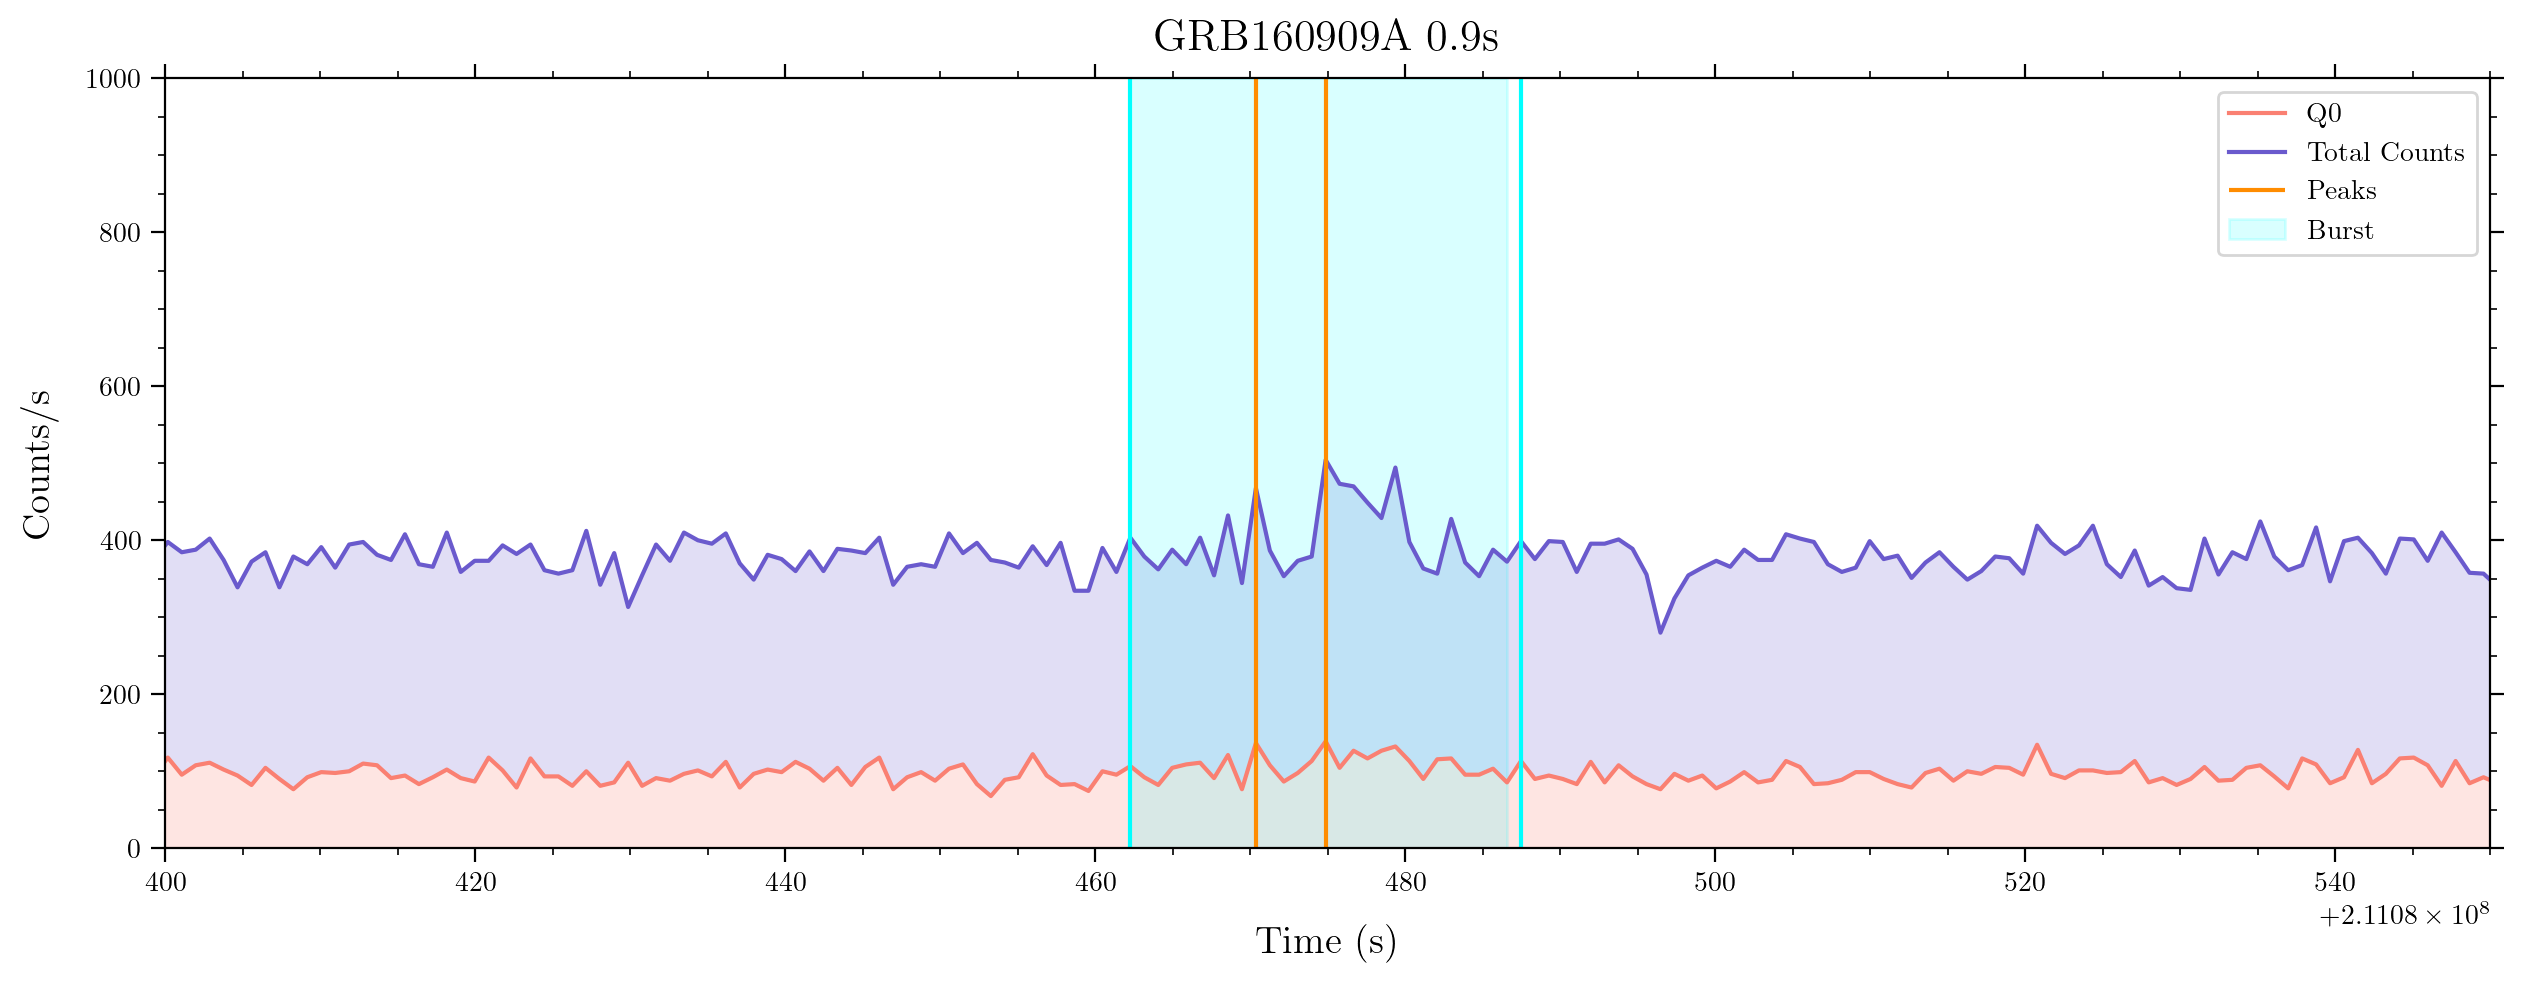

In [61]:
plt.figure(figsize=(15,5), dpi=200)
plt.plot(lc1_09_data['TIME'],lc1_09_data['RATE'], label='Q0', color='salmon')
plt.plot(total_lc_09_data['TIME'],total_counts_09, label='Total Counts', color = 'slateblue')
plt.xlim(211080400, 211080550) 
plt.ylim(0, 1000) 
plt.vlines(total_lc_09_data['TIME'][start_09], 0, 1000, color='cyan') 
plt.vlines(total_lc_09_data['TIME'][end_09], 0, 1000, color='cyan') 
plt.vlines(total_lc_09_data['TIME'][max_09], 0, 1000, color='darkorange', label='Peaks') 
plt.vlines(total_lc_09_data['TIME'][max_09-5], 0, 1000, color='darkorange')
plt.fill_between(total_lc_09_data['TIME'], lc1_09_data['RATE'], total_counts_09, color='slateblue', alpha=0.2)
plt.fill_between(total_lc_09_data['TIME'], 0, lc1_09_data['RATE'], color='salmon', alpha=0.2)
plt.fill_between(total_lc_09_data['TIME'][start_09:end_09],1000, color='cyan', alpha=0.15, label="Burst")
plt.xlabel('Time (s)', labelpad=10, fontsize=14)
plt.ylabel('Counts/s', labelpad=10, fontsize=14)
plt.title('GRB160909A 0.9s', fontsize=16, pad=10)
plt.legend()
plt.show()

In [62]:
snr_gauss_09, *_, popt_gauss_09 = pf.snr_gauss(total_lc_09, start_09, end_09, in_bins=100, window=201)
snr_gamma_09, *_, popt_gamma_09 = pf.snr_gamma(total_lc_09, start_09, end_09, in_bins=100, window=201)
snr_skewnorm_09, *_, popt_skewnorm_09 = pf.snr_skewnorm(total_lc_09, start_09, end_09, in_bins=100, window=201)
snr_poisson_09, *_, popt_poisson_09 = pf.snr_poisson(total_lc_09, start_09, end_09, in_bins=100, window=201)
snr_counts_09 = pf.snr_counts(total_lc_09, start_09, end_09, window=201)

In [63]:
print("SNR for Gaussian Fit: ", snr_gauss_09)
print("SNR for Gamma Fit: ", snr_gamma_09)
print("SNR for Skewnorm Fit: ", snr_skewnorm_09)
print("SNR for Poisson Fit: ", snr_poisson_09)
print("SNR for Counts: ", snr_counts_09)

SNR for Gaussian Fit:  1.313428354360755
SNR for Gamma Fit:  0.9601417238708609
SNR for Skewnorm Fit:  0.930886390884318
SNR for Poisson Fit:  0.9963630796239219
SNR for Counts:  2.0892575087339895


# **1s**

In [64]:
lc1_1 = '/home/ravioli/astro/ksp/grb/GRB160909A/1s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q0.lc'
lc2_1 = '/home/ravioli/astro/ksp/grb/GRB160909A/1s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q1.lc'
lc3_1 = '/home/ravioli/astro/ksp/grb/GRB160909A/1s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q2.lc'
lc4_1 = '/home/ravioli/astro/ksp/grb/GRB160909A/1s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q3.lc'

lc1_1_data = pf.openlc(lc1_1)
lc2_1_data = pf.openlc(lc2_1)
lc3_1_data = pf.openlc(lc3_1)
lc4_1_data = pf.openlc(lc4_1)

total_counts = lc1_1_data['RATE'] + lc2_1_data['RATE'] + lc3_1_data['RATE'] + lc4_1_data['RATE']
total_lc_1 = '/home/ravioli/astro/ksp/grb/GRB160909A/1s/GRB160909A-total-counts.lc'

total_lc_1_data = pf.openlc(total_lc_1)

In [111]:
max_1 = np.where(total_counts == np.max(total_counts[758:858]))[0][0]
start_1 = max_1-15
end_1 = max_1+5
print(start_1, end_1)

823 843


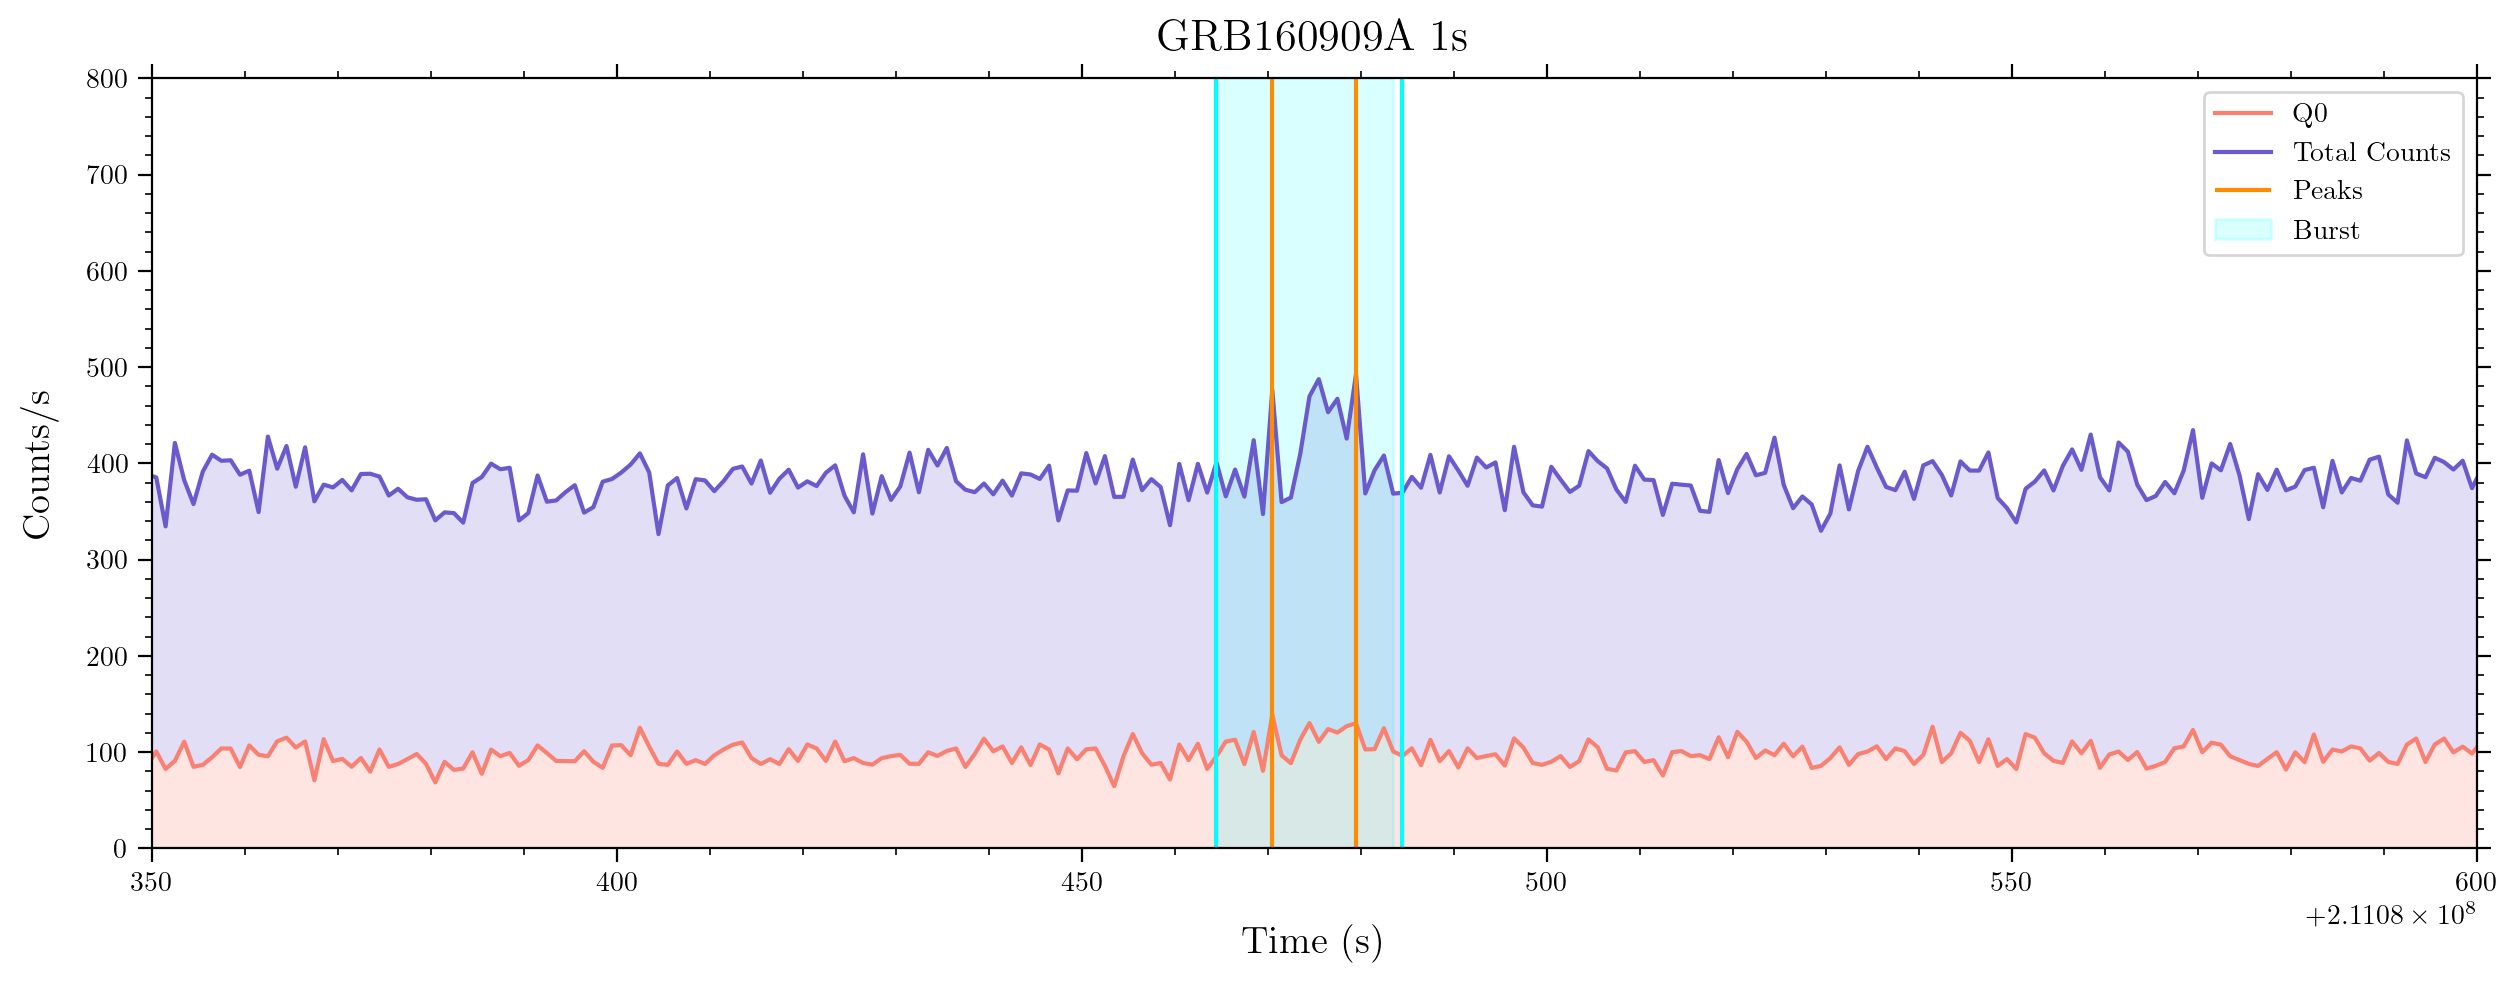

In [66]:
plt.figure(figsize=(15,5), dpi=200)
plt.plot(lc1_1_data['TIME'],lc1_1_data['RATE'], label='Q0', color='salmon')
plt.plot(total_lc_1_data['TIME'], total_counts, label='Total Counts', color = 'slateblue')
plt.xlim(211080350, 211080600)
plt.ylim(0, 800)
plt.vlines(total_lc_1_data['TIME'][start_1], 0, 800, color='cyan')
plt.vlines(total_lc_1_data['TIME'][end_1], 0, 800, color='cyan')
plt.vlines(total_lc_1_data['TIME'][max_1], 0, 800, color='darkorange', label='Peaks')
plt.vlines(total_lc_1_data['TIME'][max_1-9], 0, 800, color='darkorange')
plt.fill_between(total_lc_1_data['TIME'], lc1_1_data['RATE'], total_counts, color='slateblue', alpha=0.2)
plt.fill_between(total_lc_1_data['TIME'], 0, lc1_1_data['RATE'], color='salmon', alpha=0.2)
plt.fill_between(total_lc_1_data['TIME'][start_1:end_1],800, color='cyan', alpha=0.15, label="Burst")
plt.xlabel('Time (s)', labelpad=10, fontsize=14)
plt.ylabel('Counts/s', labelpad=10, fontsize=14)
plt.title('GRB160909A 1s', fontsize=16, pad=10)
plt.legend()
plt.show()

In [67]:
snr_gauss_1, *_, popt_gauss_1 = pf.snr_gauss(total_lc_1, start_1, end_1, in_bins=200)
snr_gamma_1, *_, popt_gamma_1 = pf.snr_gamma(total_lc_1, start_1, end_1, in_bins=200)
snr_skewnorm_1, *_, popt_skewnorm_1 = pf.snr_skewnorm(total_lc_1, start_1, end_1, in_bins=200)
snr_poisson_1, *_, popt_poisson_1 = pf.snr_poisson(total_lc_1, start_1, end_1, in_bins=200)
snr_counts_1 = pf.snr_counts(total_lc_1, start_1, end_1)

In [68]:
print("SNR for Gaussian Fit: ", snr_gauss_1)
print("SNR for Gamma Fit: ", snr_gamma_1)
print("SNR for Skewnorm Fit: ", snr_skewnorm_1)
print("SNR for Poisson Fit: ", snr_poisson_1)
print("SNR for Counts: ", snr_counts_1)

SNR for Gaussian Fit:  1.058297526613587
SNR for Gamma Fit:  1.0073031318815873
SNR for Skewnorm Fit:  1.0294859877398477
SNR for Poisson Fit:  1.004266058280188
SNR for Counts:  2.3762250875406767


# **Rebinning from 0.1s**

## **0.2s**

In [69]:
rebin_02_data = pf.rebin(total_lc_01_data['RATE'], total_lc_01_data['TIME'], 0.2)
rebin_02_data = pd.DataFrame({'RATE': rebin_02_data[0], 'TIME': rebin_02_data[1]})

In [70]:
snr_gauss_rebin_02, *_ = pf.snr_gauss('x',start=start_02, end=end_02, in_bins=100, window=901, d=rebin_02_data)
snr_gamma_rebin_02, *_ = pf.snr_gamma('x',start=start_02, end=end_02, in_bins=100, window=901, d=rebin_02_data)
snr_skewnorm_rebin_02, *_ = pf.snr_skewnorm('x',start=start_02, end=end_02, in_bins=100, window=901, d=rebin_02_data)
snr_poisson_rebin_02, *_ = pf.snr_poisson('x',start=start_02, end=end_02, in_bins=100, window=901, d=rebin_02_data)

## **0.3s**

In [71]:
rebin_03_data = pf.rebin(total_lc_01_data['RATE'], total_lc_01_data['TIME'], 0.3)
rebin_03_data = pd.DataFrame({'RATE': rebin_03_data[0], 'TIME': rebin_03_data[1]})

In [72]:
snr_gauss_rebin_03, *_ = pf.snr_gauss('x',start=start_03, end=end_03, in_bins=100, window=801, d=rebin_03_data)
snr_gamma_rebin_03, *_ = pf.snr_gamma('x',start=start_03, end=end_03, in_bins=100, window=801, d=rebin_03_data)
snr_skewnorm_rebin_03, *_ = pf.snr_skewnorm('x',start=start_03, end=end_03, in_bins=100, window=801, d=rebin_03_data)
snr_poisson_rebin_03, *_ = pf.snr_poisson('x',start=start_03, end=end_03, in_bins=100, window=801, d=rebin_03_data)

## **0.4s**

In [73]:
rebin_04_data = pf.rebin(total_lc_01_data['RATE'], total_lc_01_data['TIME'], 0.4)
rebin_04_data = pd.DataFrame({'RATE': rebin_04_data[0], 'TIME': rebin_04_data[1]})

In [74]:
snr_gauss_rebin_04, *_ = pf.snr_gauss('x',start=start_04, end=end_04, in_bins=100, window=701, d=rebin_04_data)
snr_gamma_rebin_04, *_ = pf.snr_gamma('x',start=start_04, end=end_04, in_bins=100, window=701, d=rebin_04_data)
snr_skewnorm_rebin_04, *_ = pf.snr_skewnorm('x',start=start_04, end=end_04, in_bins=100, window=701, d=rebin_04_data)
snr_poisson_rebin_04, *_ = pf.snr_poisson('x',start=start_04, end=end_04, in_bins=100, window=701, d=rebin_04_data)

## **0.5s**

In [75]:
rebin_05_data = pf.rebin(total_lc_01_data['RATE'], total_lc_01_data['TIME'], 0.5)
rebin_05_data = pd.DataFrame({'RATE': rebin_05_data[0], 'TIME': rebin_05_data[1]})

snr_gauss_rebin_05, *_ = pf.snr_gauss('x',start=start_05, end=end_05, in_bins=100, window=601, d=rebin_05_data)
snr_gamma_rebin_05, *_ = pf.snr_gamma('x',start=start_05, end=end_05, in_bins=100, window=601, d=rebin_05_data)
snr_skewnorm_rebin_05, *_ = pf.snr_skewnorm('x',start=start_05, end=end_05, in_bins=100, window=601, d=rebin_05_data)
snr_poisson_rebin_05, *_ = pf.snr_poisson('x',start=start_05, end=end_05, in_bins=100, window=601, d=rebin_05_data)

## **0.6s**

In [76]:
rebin_06_data = pf.rebin(total_lc_01_data['RATE'], total_lc_01_data['TIME'], 0.6)
rebin_06_data = pd.DataFrame({'RATE': rebin_06_data[0], 'TIME': rebin_06_data[1]})

snr_gauss_rebin_06, *_ = pf.snr_gauss('x',start=start_06, end=end_06, in_bins=100, window=501, d=rebin_06_data)
snr_gamma_rebin_06, *_ = pf.snr_gamma('x',start=start_06, end=end_06, in_bins=100, window=501, d=rebin_06_data)
snr_skewnorm_rebin_06, *_ = pf.snr_skewnorm('x',start=start_06, end=end_06, in_bins=100, window=501, d=rebin_06_data)
snr_poisson_rebin_06, *_ = pf.snr_poisson('x',start=start_06, end=end_06, in_bins=100, window=501, d=rebin_06_data)

## **0.7s**

In [77]:
rebin_07_data = pf.rebin(total_lc_01_data['RATE'], total_lc_01_data['TIME'], 0.7)
rebin_07_data = pd.DataFrame({'RATE': rebin_07_data[0], 'TIME': rebin_07_data[1]})

snr_gauss_rebin_07, *_ = pf.snr_gauss('x',start=start_07, end=end_07, in_bins=100, window=401, d=rebin_07_data)
snr_gamma_rebin_07, *_ = pf.snr_gamma('x',start=start_07, end=end_07, in_bins=100, window=401, d=rebin_07_data)
snr_skewnorm_rebin_07, *_ = pf.snr_skewnorm('x',start=start_07, end=end_07, in_bins=100, window=401, d=rebin_07_data)
snr_poisson_rebin_07, *_ = pf.snr_poisson('x',start=start_07, end=end_07, in_bins=100, window=401, d=rebin_07_data)

## **0.8s**

In [78]:
rebin_08_data = pf.rebin(total_lc_01_data['RATE'], total_lc_01_data['TIME'], 0.8)
rebin_08_data = pd.DataFrame({'RATE': rebin_08_data[0], 'TIME': rebin_08_data[1]})
snr_gauss_rebin_08, *_ = pf.snr_gauss('x',start=start_08, end=end_08, in_bins=100, window=301, d=rebin_08_data)
snr_gamma_rebin_08, *_ = pf.snr_gamma('x',start=start_08, end=end_08, in_bins=100, window=301, d=rebin_08_data)
snr_skewnorm_rebin_08, *_ = pf.snr_skewnorm('x',start=start_08, end=end_08, in_bins=100, window=301, d=rebin_08_data)
snr_poisson_rebin_08, *_ = pf.snr_poisson('x',start=start_08, end=end_08, in_bins=100, window=301, d=rebin_08_data)

## **0.9s**

In [79]:
rebin_09_data = pf.rebin(total_lc_01_data['RATE'], total_lc_01_data['TIME'], 0.9)
rebin_09_data = pd.DataFrame({'RATE': rebin_09_data[0], 'TIME': rebin_09_data[1]})
snr_gauss_rebin_09, *_ = pf.snr_gauss('x',start=start_09, end=end_09, in_bins=100, window=201, d=rebin_09_data)
snr_gamma_rebin_09, *_ = pf.snr_gamma('x',start=start_09, end=end_09, in_bins=100, window=201, d=rebin_09_data)
snr_skewnorm_rebin_09, *_ = pf.snr_skewnorm('x',start=start_09, end=end_09, in_bins=100, window=201, d=rebin_09_data)
snr_poisson_rebin_09, *_ = pf.snr_poisson('x',start=start_09, end=end_09, in_bins=100, window=201, d=rebin_09_data)

## **1s**

In [80]:
rebin_1_data = pf.rebin(total_lc_01_data['RATE'], total_lc_01_data['TIME'], 1)
rebin_1_data = pd.DataFrame({'RATE': rebin_1_data[0], 'TIME': rebin_1_data[1]})
snr_gauss_rebin_1, *_ = pf.snr_gauss('x',start=start_1, end=end_1, in_bins=100, window=101, d=rebin_1_data)
snr_gamma_rebin_1, *_ = pf.snr_gamma('x',start=start_1, end=end_1, in_bins=100, window=101, d=rebin_1_data)
snr_skewnorm_rebin_1, *_ = pf.snr_skewnorm('x',start=start_1, end=end_1, in_bins=100, window=101, d=rebin_1_data)
snr_poisson_rebin_1, *_ = pf.snr_poisson('x',start=start_1, end=end_1, in_bins=100, window=101, d=rebin_1_data)

# **Results**

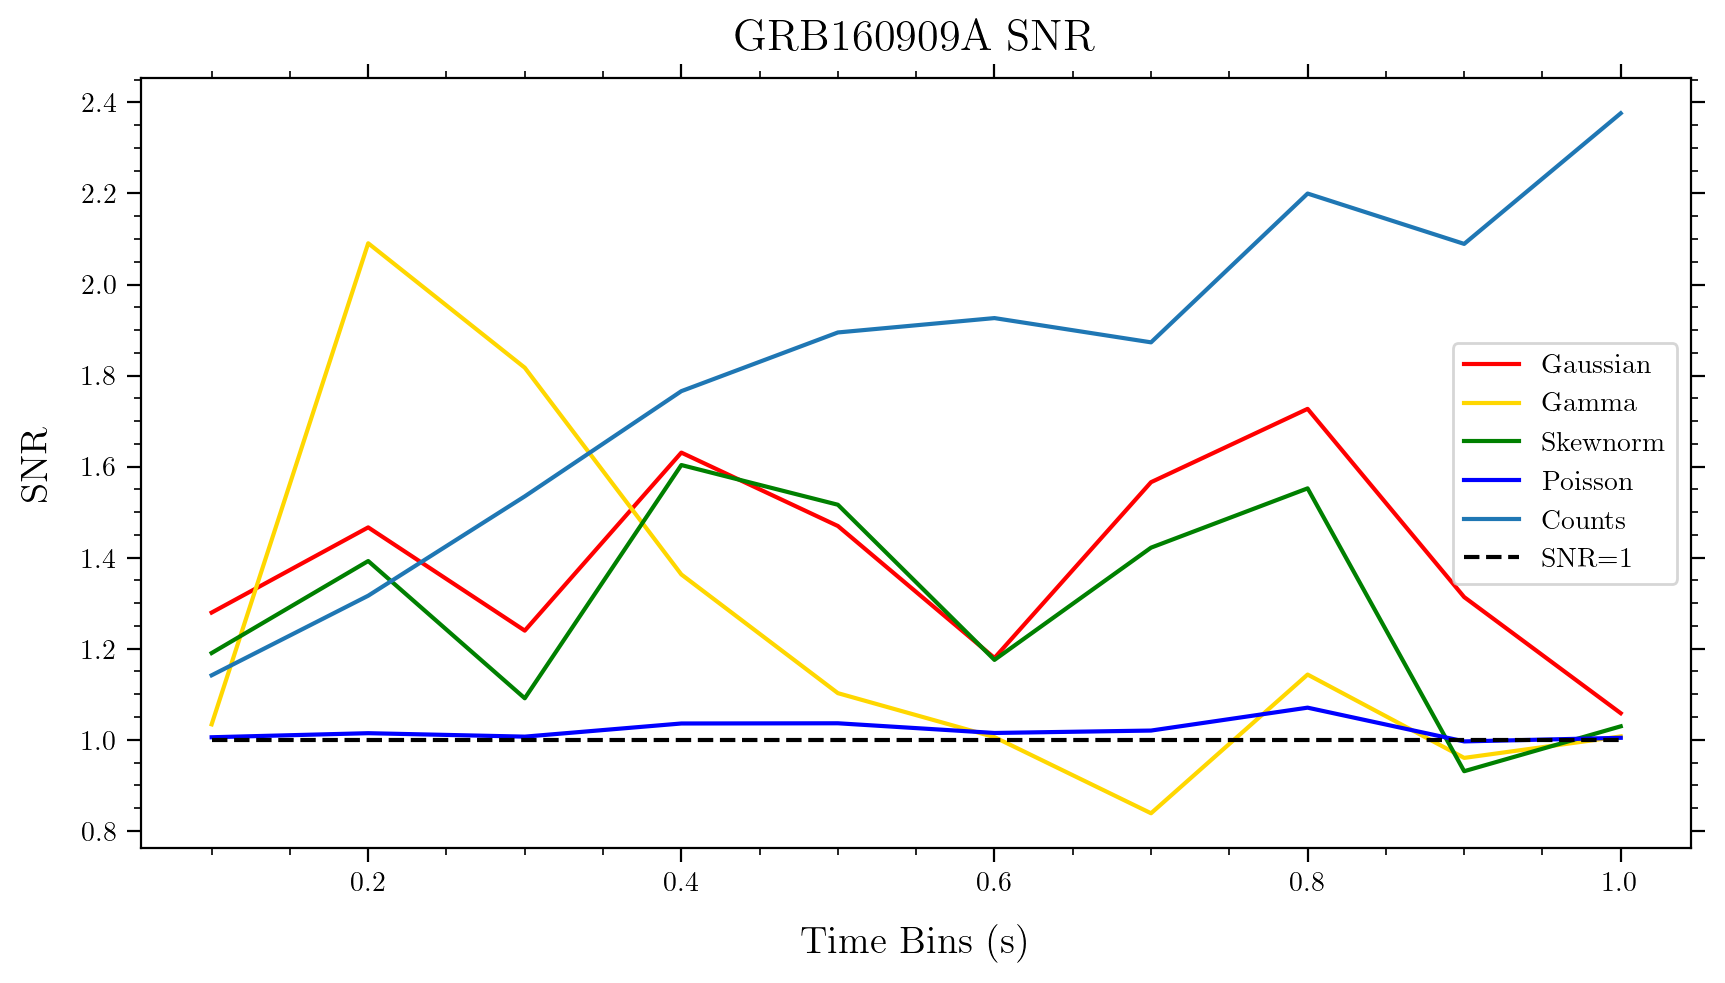

In [104]:
snr_gauss = [snr_gauss_01, snr_gauss_02, snr_gauss_03, snr_gauss_04, snr_gauss_05, snr_gauss_06, snr_gauss_07, snr_gauss_08, snr_gauss_09, snr_gauss_1]
snr_gamma = [snr_gamma_01, snr_gamma_02, snr_gamma_03, snr_gamma_04, snr_gamma_05, snr_gamma_06, snr_gamma_07, snr_gamma_08, snr_gamma_09, snr_gamma_1]
snr_skewnorm = [snr_skewnorm_01, snr_skewnorm_02, snr_skewnorm_03, snr_skewnorm_04, snr_skewnorm_05, snr_skewnorm_06, snr_skewnorm_07, snr_skewnorm_08, snr_skewnorm_09, snr_skewnorm_1]
snr_poisson = [snr_poisson_01, snr_poisson_02, snr_poisson_03, snr_poisson_04, snr_poisson_05, snr_poisson_06, snr_poisson_07, snr_poisson_08, snr_poisson_09, snr_poisson_1]
snr_counts = [snr_counts_01, snr_counts_02, snr_counts_03, snr_counts_04, snr_counts_05, snr_counts_06, snr_counts_07, snr_counts_08, snr_counts_09, snr_counts_1]
snr_gauss_rebin = [snr_gauss_rebin_02, snr_gauss_rebin_03, snr_gauss_rebin_04, snr_gauss_rebin_05, snr_gauss_rebin_06, snr_gauss_rebin_07, snr_gauss_rebin_08, snr_gauss_rebin_09, snr_gauss_rebin_1]
snr_gamma_rebin = [snr_gamma_rebin_02, snr_gamma_rebin_03, snr_gamma_rebin_04, snr_gamma_rebin_05, snr_gamma_rebin_06, snr_gamma_rebin_07, snr_gamma_rebin_08,  snr_gamma_rebin_09, snr_gamma_rebin_1]
snr_skewnorm_rebin = [snr_skewnorm_rebin_02, snr_skewnorm_rebin_03, snr_skewnorm_rebin_04, snr_skewnorm_rebin_05, snr_skewnorm_rebin_06, snr_skewnorm_rebin_07, snr_skewnorm_rebin_08, snr_skewnorm_rebin_09, snr_skewnorm_rebin_1]
snr_poisson_rebin = [snr_poisson_rebin_02, snr_poisson_rebin_03, snr_poisson_rebin_04, snr_poisson_rebin_05, snr_poisson_rebin_06, snr_poisson_rebin_07, snr_poisson_rebin_08, snr_poisson_rebin_09, snr_poisson_rebin_1]

times = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6 ,0.7, 0.8, 0.9, 1]

plt.figure(figsize=(10,5), dpi=200)
plt.plot(times, snr_gauss, label='Gaussian', color='red')
plt.plot(times, snr_gamma, label='Gamma', color='gold')
plt.plot(times, snr_skewnorm, label='Skewnorm', color='green')
plt.plot(times, snr_poisson, label='Poisson', color='blue')
plt.plot(times, snr_counts, label='Counts')
plt.plot(times, np.linspace(1, 1, 10), label='SNR=1', color='black', linestyle='--')
plt.xlabel('Time Bins (s)', labelpad=10, fontsize=14)
plt.ylabel('SNR', labelpad=10, fontsize=14)
plt.title('GRB160909A SNR', fontsize=16, pad=10)
plt.legend()
plt.show()

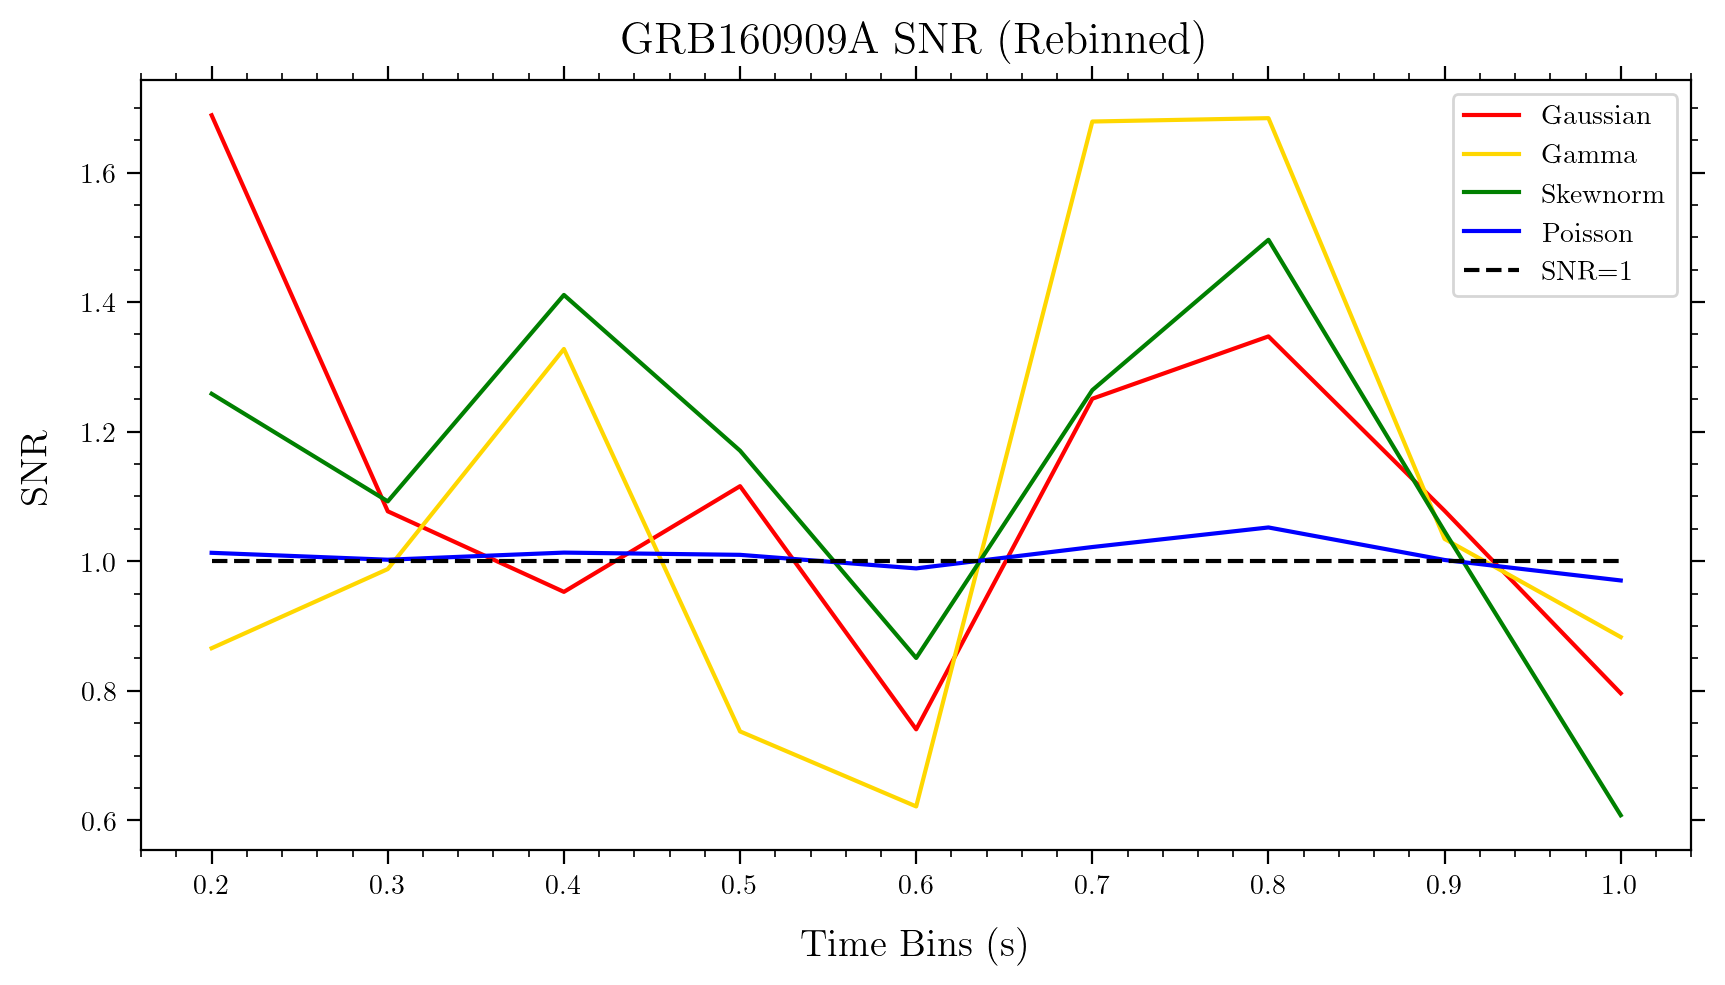

In [82]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(times[1:], snr_gauss_rebin, label='Gaussian', color='red')
plt.plot(times[1:], snr_gamma_rebin, label='Gamma', color='gold')
plt.plot(times[1:], snr_skewnorm_rebin, label='Skewnorm', color='green')
plt.plot(times[1:], snr_poisson_rebin, label='Poisson', color='blue')
plt.plot(times[1:], np.linspace(1, 1, 9), label='SNR=1', color='black', linestyle='--')
plt.xlabel('Time Bins (s)', labelpad=10, fontsize=14)
plt.ylabel('SNR', labelpad=10, fontsize=14)
plt.title('GRB160909A SNR (Rebinned)', fontsize=16, pad=10)
plt.legend()
plt.show()

Text(0, 0.5, 'Location')

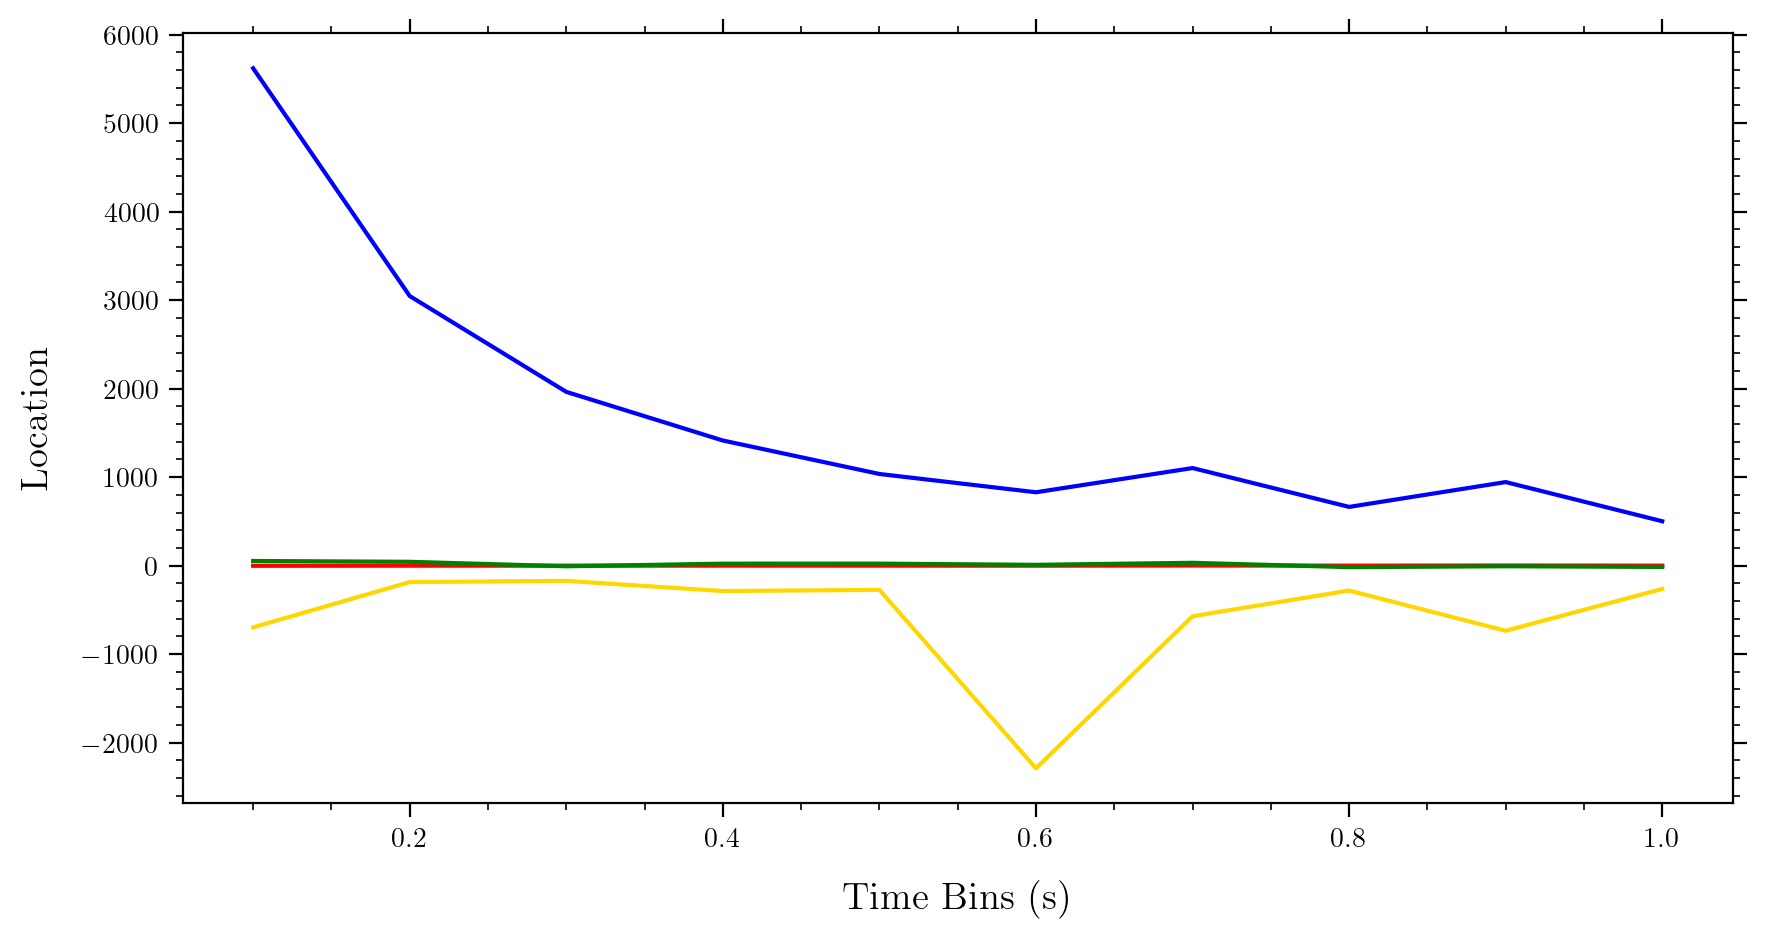

In [105]:
loc_gamma = [popt_gamma_01[2], popt_gamma_02[2], popt_gamma_03[2], popt_gamma_04[2], popt_gamma_05[2], popt_gamma_06[2], popt_gamma_07[2], popt_gamma_08[2], popt_gamma_09[2], popt_gamma_1[2]]
loc_skewnorm = [popt_skewnorm_01[2], popt_skewnorm_02[2], popt_skewnorm_03[2], popt_skewnorm_04[2], popt_skewnorm_05[2], popt_skewnorm_06[2], popt_skewnorm_07[2], popt_skewnorm_08[2], popt_skewnorm_09[2], popt_skewnorm_1[2]]
loc_poisson = [popt_poisson_01[0], popt_poisson_02[0], popt_poisson_03[0], popt_poisson_04[0], popt_poisson_05[0], popt_poisson_06[0], popt_poisson_07[0], popt_poisson_08[0], popt_poisson_09[0], popt_poisson_1[0]]
loc_gauss = [popt_gauss_01[1], popt_gauss_02[1], popt_gauss_03[1], popt_gauss_04[1], popt_gauss_05[1], popt_gauss_06[1], popt_gauss_07[1], popt_gauss_08[1], popt_gauss_09[1], popt_gauss_1[1]]

plt.figure(figsize=(10,5), dpi=200)
plt.plot(times, loc_gauss, label='Gaussian', color='red')
plt.plot(times, loc_gamma, label='Gamma', color='gold')
plt.plot(times, loc_skewnorm, label='Skewnorm', color='green')
plt.plot(times, loc_poisson, label='Poisson', color='blue')
plt.xlabel('Time Bins (s)', labelpad=10, fontsize=14)
plt.ylabel('Location', labelpad=10, fontsize=14)

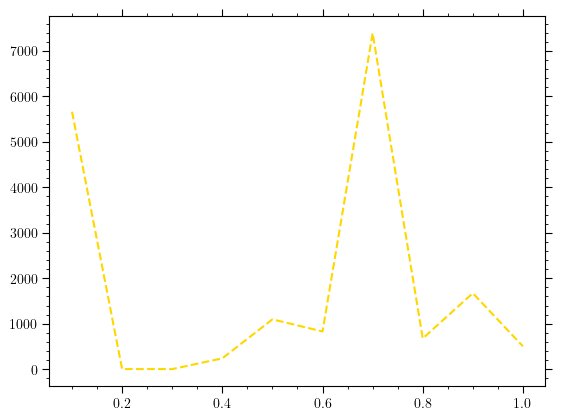

In [106]:
std_gamma = [popt_gamma_01[1]*(popt_gamma_01[3])**2, popt_gamma_02[1]*(popt_gamma_02[3])**2, popt_gamma_03[1]*(popt_gamma_03[3])**2, popt_gamma_04[1]*(popt_gamma_04[3])**2, popt_gamma_05[1]*(popt_gamma_05[3])**2, popt_gamma_06[1]*(popt_gamma_06[3])**2, popt_gamma_07[1]*(popt_gamma_07[3])**2, popt_gamma_08[1]*(popt_gamma_08[3])**2, popt_gamma_09[1]*(popt_gamma_09[3])**2, popt_gamma_1[1]*(popt_gamma_1[3])**2]
plt.plot(times, std_gamma, label='Gamma', color='gold', linestyle='--')

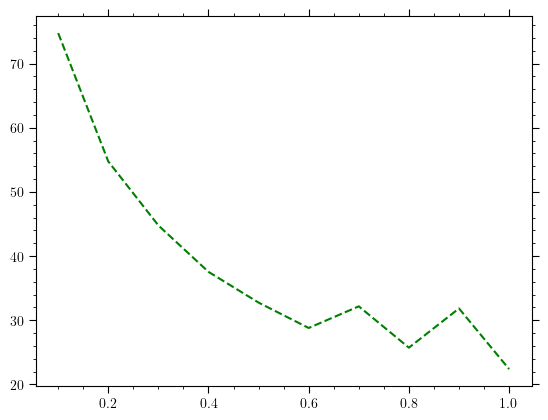

In [107]:
import scipy.stats as stats
std_skewnorm = [stats.skewnorm.std(popt_skewnorm_01[1], scale=popt_skewnorm_01[3]), stats.skewnorm.std(popt_skewnorm_02[1], scale=popt_skewnorm_02[3]), stats.skewnorm.std(popt_skewnorm_03[1], scale=popt_skewnorm_03[3]), stats.skewnorm.std(popt_skewnorm_04[1], scale=popt_skewnorm_04[3]), stats.skewnorm.std(popt_skewnorm_05[1], scale=popt_skewnorm_05[3]), stats.skewnorm.std(popt_skewnorm_06[1], scale=popt_skewnorm_06[3]), stats.skewnorm.std(popt_skewnorm_07[1], scale=popt_skewnorm_07[3]), stats.skewnorm.std(popt_skewnorm_08[1], scale=popt_skewnorm_08[3]), stats.skewnorm.std(popt_skewnorm_09[1], scale=popt_skewnorm_09[3]), stats.skewnorm.std(popt_skewnorm_1[1], scale=popt_skewnorm_1[3])]
plt.plot(times, std_skewnorm, label='Skewnorm', color='green', linestyle='--')